[Click here for live site!](https://m-sender.github.io/ServiceLearning)
<center><h1>911 Call Data in Orleans Parish</h1></center>
<center><b>Max Sender and Sam Traylor</b></center>
<center>-------------------------------------------------------</center>

<center>1. Introduction</center>
<center>2. Data: Extraction, Transform and Load</center>
<center>3. Exploratory Data Analysis</center>
<center>4. What it all means?</center>



<center><h1>1. Introduction</h1></center>

In this project, we hoped to identify trends in policing and crime across the Orleans parish that may allude to some of the systemic issues police could address more effectively. We believe that with such a largely popualted and diverse area, the issues facing Oreans parish can often be obscured by preconcieved notions of whats wrong in the Parish, and that using meaningful analysis of real data could bring the realities of Orleans parish to light in a way that's been difficult up to this point.

### Data set link: [Calls for service 2021](https://data.nola.gov/Public-Safety-and-Preparedness/Calls-for-Service-2021/3pha-hum9)

What this data set is a collection of 9-1-1 calls in 2021 in the New Orleans Area. This set contains basic things such as the type of incident, where it was, the police department, and timing, and more.

## Questions

#### The direction we're going with our project will focusing more on the crime aspect of the data set. This route will be more focused on answering questions about crime in specific areas instead of the emergency response. We find this data set to be very insightful and can answer a lot of different questions:

*   Most frequent crimes in specific areas?

*   Based on the value counts of each type of crime in each area can we generalize patterns like violent crime happening more in one area, theft in another, etc?

*   What are the most frequest crimes by time of day in conjunction with a specific district?

*   Average response time by incident?

*   Average response time by incident in specific areas?

#### We will also be looking at and loading in Census data pertaining to the relavent zipcodes that are in the Calls to Service dataset.

## Collaboration plan:

We plan to collaborate via meetings over zoom, and store our data in a shared github. Any particular challenges that have to be solved in a pair-programming setting will be dealt with using live share on vscode.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

<center><h1>2. Extraction, Transform and Load </h1></center>

In [7]:
df_Calls_untidy = pd.read_csv("../data/Calls_for_Service_2021.csv")
df_zones_untidy = pd.read_csv("../data/Police_Zones_data.csv")

# Calls For Service 2021 
 **Columns Explained:**
* TypeText: Type of incident (text)
* Priority: Priority of incident (ID)
* InitialTypeText: Initial type of incident (text)
* InitialPriority: Initial priority of incident (ID)
* TimeCreate: Time of incident
* TimeDispatch: Time of dispatch
* TimeArrive: Time of arrival
* TimeClose: Time of closure
* DispositionText: Disposition of incident (text)
* SelfInitiated: Self-initiated (Y or N)
* BLOCK_ADDRESS: Block address of incident
* Zip: Zip code of incident
* PoliceDistrict: Police district of incident (ID)
* Location: Location of incident (ID)
Each entry in the dataset in a unique call to 911 dispatch with relevant information.

# Tidying Up Data

In [8]:
df_Calls = df_Calls_untidy.drop(columns=['NOPD_Item','Type','InitialType','MapX','MapY','Disposition','Beat'])

df_Calls = df_Calls.astype({'TimeCreate':'datetime64[ns]','TimeDispatch':'datetime64[ns]',"TimeArrive":'datetime64[ns]',"TimeClosed":'datetime64[ns]'})

df_Calls["responseTime"] = df_Calls.TimeArrive - df_Calls.TimeDispatch

df_Calls = df_Calls[df_Calls['responseTime'] > pd.Timedelta(0)]
df_Calls.dropna(subset=['responseTime'], inplace=True)

df_Calls

,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,responseTime
1,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301),0 days 00:04:02
7,DISCHARGING FIREARM,2D,DISCHARGING FIREARM,2D,2021-01-01 00:04:11,2021-01-01 00:59:42,2021-01-01 00:59:57,2021-01-01 01:06:54,GONE ON ARRIVAL,N,011XX Blk Tupelo St,70117,5,POINT (-90.01110609 29.96044253),0 days 00:00:15
8,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:04:19,2021-01-01 00:53:10,2021-01-01 01:35:08,2021-01-01 01:56:55,REPORT TO FOLLOW,N,012XX Blk Elysian Fields Ave,70116,5,POINT (-90.05709394 29.97004982),0 days 00:41:58
9,FIREWORKS,1A,FIGHT,2D,2021-01-01 00:06:10,2021-01-01 02:51:34,2021-01-01 03:09:39,2021-01-01 03:22:54,GONE ON ARRIVAL,N,016XX S Liberty St,70113,6,POINT (-90.08341098 29.94165311),0 days 00:18:05
11,AUTO ACCIDENT WITH INJURY,2D,AUTO ACCIDENT WITH INJURY,2D,2021-01-01 00:06:45,2021-01-01 00:11:23,2021-01-01 01:13:38,2021-01-01 04:22:50,REPORT TO FOLLOW,N,St Claude Bridge Westbound,70117,5,POINT (-90.02737517 29.96389326),0 days 01:02:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378670,MEDICAL,2D,INCIDENT REQUESTED BY ANOTHER AGENCY,2A,2021-11-09 01:56:00,2021-11-09 01:57:13,2021-11-09 02:04:41,2021-11-09 03:10:41,REPORT TO FOLLOW,N,009XX Lesseps St,70117,5,POINT (0 0),0 days 00:07:28
378675,COMPLAINT OTHER,1J,AUTO THEFT,1D,2021-11-09 11:16:40,2021-11-09 12:05:13,2021-11-09 12:11:11,2021-11-09 12:17:37,Necessary Action Taken,N,009XX Dumaine St,70116,8,POINT (-90.06557795 29.96130734),0 days 00:05:58
378678,COMPLAINT OTHER,1J,INCIDENT REQUESTED BY ANOTHER AGENCY,2A,2021-11-09 17:16:17,2021-11-09 17:17:48,2021-11-09 17:26:53,2021-11-09 17:36:21,Necessary Action Taken,N,026XX General Meyer Ave,70114,4,POINT (-90.03027856 29.93946187),0 days 00:09:05
378680,COMPLAINT OTHER,1J,TRAFFIC INCIDENT,1J,2021-11-09 19:32:33,2021-11-09 19:35:10,2021-11-09 19:40:43,2021-11-09 21:41:39,Necessary Action Taken,N,I-10 W,70119,1,POINT (-90.10113272 29.96286033),0 days 00:05:33


Here, we've dropped some uncessesary columns casted the TimeCreate, TimeDispatch, and TimeArrived columns to the datettime64[ns] type for easier analysis, and created a response time column which shows the time it took from the moment of dispatch to the moment of arrival. We've also dropped calls where the reported dispatch and arrival times result in a negative response time as that's clearly not possible, and we've dropped rows where the response time could not be calculated (had a value of NaN).

# Getting Relevant Data

To make our data easier to work with and remove outliers, we have chosen to work with the 3rd to 30th most popular types of crimes by frequency in this dataset.

In [9]:
new_df = df_Calls.TypeText.value_counts()
top_Call_df = df_Calls[df_Calls.TypeText.isin(new_df[2:30].index)]
top_Call_df["TypeText"].unique()

array(['BURGLAR ALARM, SILENT', 'DISCHARGING FIREARM',
       'AUTO ACCIDENT WITH INJURY', 'FIGHT', 'DOMESTIC DISTURBANCE',
       'SIMPLE BATTERY', 'HIT & RUN', 'HOLD UP ALARM',
       'EXTORTION (THREATS)', 'MEDICAL', 'SUSPICIOUS PERSON',
       'MENTAL PATIENT', 'TRAFFIC INCIDENT', 'AREA CHECK',
       'RECKLESS DRIVING', 'SIMPLE BATTERY DOMESTIC', 'NOISE COMPLAINT',
       'SIMPLE BURGLARY VEHICLE', 'SIMPLE CRIMINAL DAMAGE', 'THEFT',
       'AUTO ACCIDENT', 'AGGRAVATED ASSAULT', 'BUSINESS CHECK', 'PROWLER',
       'RESIDENCE BURGLARY', 'RETURN FOR ADDITIONAL INFO', 'AUTO THEFT',
       'THEFT BY FRAUD'], dtype=object)

The first and second most common types of call were disturbance (other) and complaint other, both of which tell us next to nothing about actual crime in the area and only serve to skew the dataset. By eliminating those, we're reserving these top 30 spots for call types that tell us more about actual crime trends.

In [10]:
zips = ['70124', '70115', np.nan, '70131', '70126', '70114', '70117', '70116', '70113',
 '70119', '70112', '70122', '70127', '70130', '70128', '70118', '70125', np.nan
 ,'70129', '70148']
income = [96844,66499,np.nan,52312,27026,30806,30264,48919,18148,39827,
          49439,39506,27190,53946,36414,48919,46526,np.nan,36950,np.nan] 
health = [3.8,7.2,np.nan,8.9,9.0,10.8,13.6,12.7,14.5,11.6,
          12.1,9.2,8.6,8.1,7.5,7.6,7.9,np.nan,11.7,np.nan] #percent without health care coverage from 2019
employment = [70.5, 66.1, np.nan, 59.5, 51.4, 50.7, 53.3, 54.7, 47.1, 55.5, 69.1, 69.1, 54.2, 50.6, 66.5, 53.2, 57.6,
            56.5, np.nan, 52.5] 
education = [68.3, 60.4, np.nan, 34.1, 20.9, 21.9, 25.9, 41.3, 23.5, 38.1, 58.2, 31.1, 19.4, 57.8, 26.8, 50.5, 41.2,
            np.nan, 13.2, np.nan] 
census_zip_df = pd.DataFrame({"Zip":zips,"Income":income,"Health":health,"Employment":employment,"Education":education})  
census_zip_df.dropna(axis=0)

,Zip,Income,Health,Employment,Education
0,70124,96844.0,3.8,70.5,68.3
1,70115,66499.0,7.2,66.1,60.4
3,70131,52312.0,8.9,59.5,34.1
4,70126,27026.0,9.0,51.4,20.9
5,70114,30806.0,10.8,50.7,21.9
6,70117,30264.0,13.6,53.3,25.9
7,70116,48919.0,12.7,54.7,41.3
8,70113,18148.0,14.5,47.1,23.5
9,70119,39827.0,11.6,55.5,38.1
10,70112,49439.0,12.1,69.1,58.2


In this cell, we imported data from the census bureau that can tell us a bit more about the demographic of the areas, which may help determine whether certain systemic and environmental factors like mean income, level of education, employment rates, etc. correlate with crime. It is of interest to us whether or not these factors correlate to a prevalence of a certain type of crime, an overall crime level, or a low/high response time.

<center><h1>3. Exploratory Data Analysis </h1></center>

In [11]:
print("Mean Income:",census_zip_df["Income"].mean())
print("Mean Healthcare %:",census_zip_df["Health"].mean())
print("Mean Employment %:",census_zip_df["Employment"].mean())
print("Mean Education:",census_zip_df["Education"].mean())

top_Call_df = top_Call_df.merge(census_zip_df, on="Zip")

Mean Income: 44090.294117647056
Mean Healthcare %: 9.694117647058825
Mean Employment %: 57.67222222222222
Mean Education: 37.21176470588236


In [12]:
routine_noncriminal = ["AUTO ACCIDENT", "AUTO ACCIDENT WITH INJURY", "BUSINESS CHECK", 'DIRECTED PATROL', 
                       'DISTURBANCE (OTHER)', "MEDICAL", 'MENTAL PATIENT', 'NOISE COMPLAINT', 'RETURN FOR ADDITIONAL INFO',
                       'SUSPICIOUS PERSON', 'TRAFFIC INCIDENT', 'TRAFFIC STOP', 'TOW IMPOUNDED VEHICLE (PRIVATE)',
                       'TRAFFIC STOP']

violent_crime = ['FIGHT', 'HIT & RUN', 'SIMPLE BATTERY', 'SIMPLE BATTERY DOMESTIC']
nonviolent_crime = ['SIMPLE BURGLARY VEHICLE', 'THEFT BY FRAUD', 'SIMPLE CRIMINAL DAMAGE']

potentially_violent_crime = ['THEFT', 'BURGLAR ALARM, SILENT', 'DISCHARGING FIREARM', 'AUTO THEFT', 'HOLD UP ALARM',
                             'RECKLESS DRIVING', 'DOMESTIC DISTURBANCE'] 

top_Call_df['typeCall'] = np.nan

top_Call_df["typeCall"] = top_Call_df.TypeText.map(lambda x: 'routine_noncriminal' if (x in routine_noncriminal) else 'violent_crime' if (x in violent_crime) else 'nonviolent_crime' if (x in nonviolent_crime) else 'potentially_violent_crime' if (x in potentially_violent_crime) else "other")
top_Call_df["typeRank"] = top_Call_df.TypeText.map(lambda x: 0 if (x in routine_noncriminal) else 3 if (x in violent_crime) else 1 if (x in nonviolent_crime) else 2 if (x in potentially_violent_crime) else np.nan)
time_of_day = top_Call_df.TimeCreate.dt.hour
top_Call_df['Hour'] = time_of_day
top_Call_df['TimeOfDay'] =top_Call_df.Hour.map(lambda x: 'Morning' if (x< 12 and x>5) else 'Afternoon' if x < 18 else 'Evening/Night')

#top_Call_df = top_Call_df[top_Call_df.responseTime.between(top_Call_df.responseTime.quantile(0.05), top_Call_df.responseTime.quantile(0.95))]
top_Call_df['responseSeconds'] = top_Call_df.responseTime.dt.seconds

Here, we divide the top 30 most common crimes into categories, including routine_noncriminal, nonviolent_crime, potentially_violent_crime, and violent_crime. These categories give a little bit of insight and allow for more useful classification than just trying to predict the 1 crime that will happen at a certain time or in a certain district.

We also converted time into hours so that we could differentiate between the times of day that the calls happened and the use classification on those time periods. Last but not least, we removed calls whose response times were extreme outliers. 

# Basic Analysis

In [14]:
print("Maximum response time: ", df_Calls.responseTime.max())
print("Mean response time: ", df_Calls.responseTime.mean()) 
print("Minimum response time: ", df_Calls.responseTime.min(), "\n")

Maximum response time:  3 days 01:03:27
Mean response time:  0 days 00:12:22.696326487
Minimum response time:  0 days 00:00:01 



This obviously is a problem: there can't be response times of negative one days, or any negative amount of time, for obvious reasons. To fix this we strip negative values, as well as any rows with NaN values because they will cause errors in visualization later.

Minimum response time:  1 
 This is still very short...


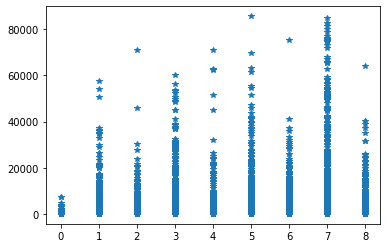

In [15]:
print("Minimum response time: ", top_Call_df.responseSeconds.min(), "\n", "This is still very short...")

plt.plot(top_Call_df.PoliceDistrict, top_Call_df.responseSeconds, "*")

Average response time in District 0 :  0 days 00:12:11.072222222
Average response time in District 1 :  0 days 00:08:49.940540966
Average response time in District 2 :  0 days 00:09:54.924598981
Average response time in District 3 :  0 days 00:12:19.241402521
Average response time in District 4 :  0 days 00:09:00.468337218
Average response time in District 5 :  0 days 00:12:53.388202289
Average response time in District 6 :  0 days 00:09:44.989616554
Average response time in District 7 :  0 days 00:19:58.009505488
Average response time in District 8 :  0 days 00:10:01.618438692


<AxesSubplot:xlabel='PoliceDistrict', ylabel='Seconds'>

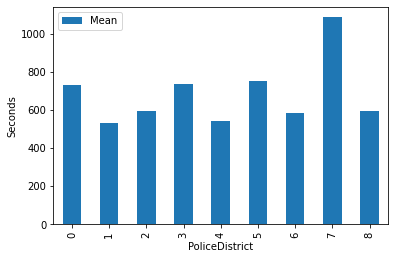

In [16]:
districtMeans = pd.DataFrame(index=top_Call_df["PoliceDistrict"].unique(), columns=["PoliceDistrict","Mean"])
districtMeans["PoliceDistrict"] = top_Call_df["PoliceDistrict"].sort_values().unique()
means = []

mean_by_zone = top_Call_df.groupby(["PoliceDistrict"])
for group in mean_by_zone:
    print("Average response time in District", group[0], ": ", group[1].responseTime.mean())
    means.append(group[1].responseSeconds.mean())
    
districtMeans["Mean"] = means
 
districtMeans.plot.bar(x="PoliceDistrict", y="Mean", ylabel="Seconds")

The calls recieved are overwhelmingly either area checks or "complaint other" types. Because these are very generic and non-descriptive categories that don't tell much about the problems a district is facing, and because they skew the dataset by making up a massive portion, we remove those calls.

In [17]:
type_by_district = top_Call_df[['PoliceDistrict','TypeText']].pivot_table(index=['PoliceDistrict'],columns=['TypeText'],aggfunc=np.count_nonzero)
type_by_zipcode = top_Call_df[['Zip','TypeText']].pivot_table(index=['Zip'],columns=['TypeText'],aggfunc=np.count_nonzero)

df_Calls_marg_district = type_by_district.T / type_by_district.T.sum()
df_Calls_marg_zip = type_by_zipcode.T / type_by_zipcode.T.sum()
pop_district = type_by_district.T.idxmax()
pop_zip = type_by_zipcode.T.idxmax()
type_by_district_with_freq =  pd.merge(type_by_district, pop_district.rename('Most Frequent'), 'outer',on='PoliceDistrict')
type_by_zipcode_with_freq = pd.merge(type_by_zipcode, pop_zip.rename('Most Frequent'), 'outer',on='Zip')

In [18]:
print("Most Frequent Crimes by District:") 
print(pop_district)

Most Frequent Crimes by District:
PoliceDistrict
0     DOMESTIC DISTURBANCE
1               AREA CHECK
2    BURGLAR ALARM, SILENT
3    BURGLAR ALARM, SILENT
4               AREA CHECK
5     DOMESTIC DISTURBANCE
6    BURGLAR ALARM, SILENT
7     DOMESTIC DISTURBANCE
8    BURGLAR ALARM, SILENT
dtype: object


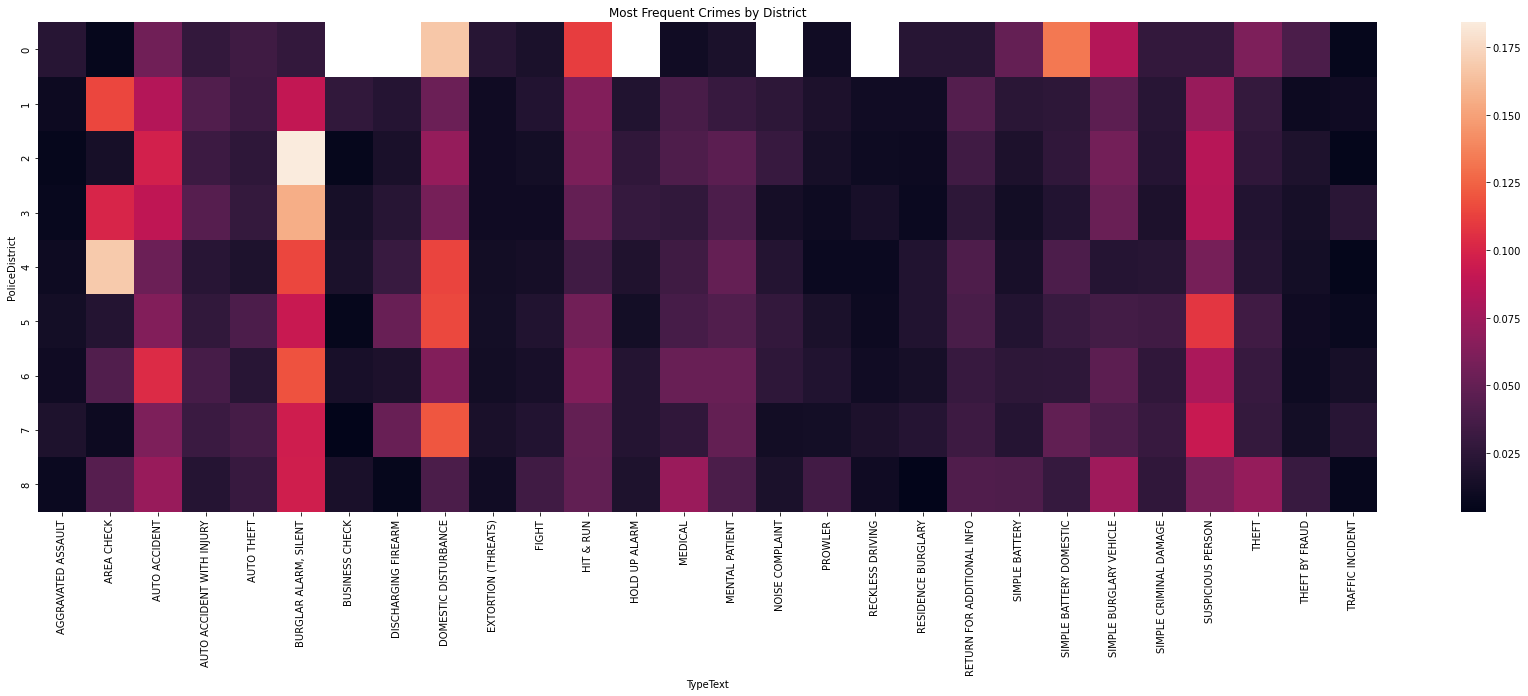

In [19]:
ax = plt.subplots(figsize=(30,9))
plt.title("Most Frequent Crimes by District")

heat_map_districts_marginal = sns.heatmap(df_Calls_marg_district.T)

The graph above is showing the conditional distribution of types of crime by police district, displayed in a heatmap.
This could be a good metric to work with as we analyze the types of crimes and the distribution of crimes in each police district.

<AxesSubplot:title={'center':'Conditional Distribution of type of Crime by District'}, ylabel='PoliceDistrict'>

<AxesSubplot:title={'center':'Count of type of Crime by District'}, ylabel='PoliceDistrict'>

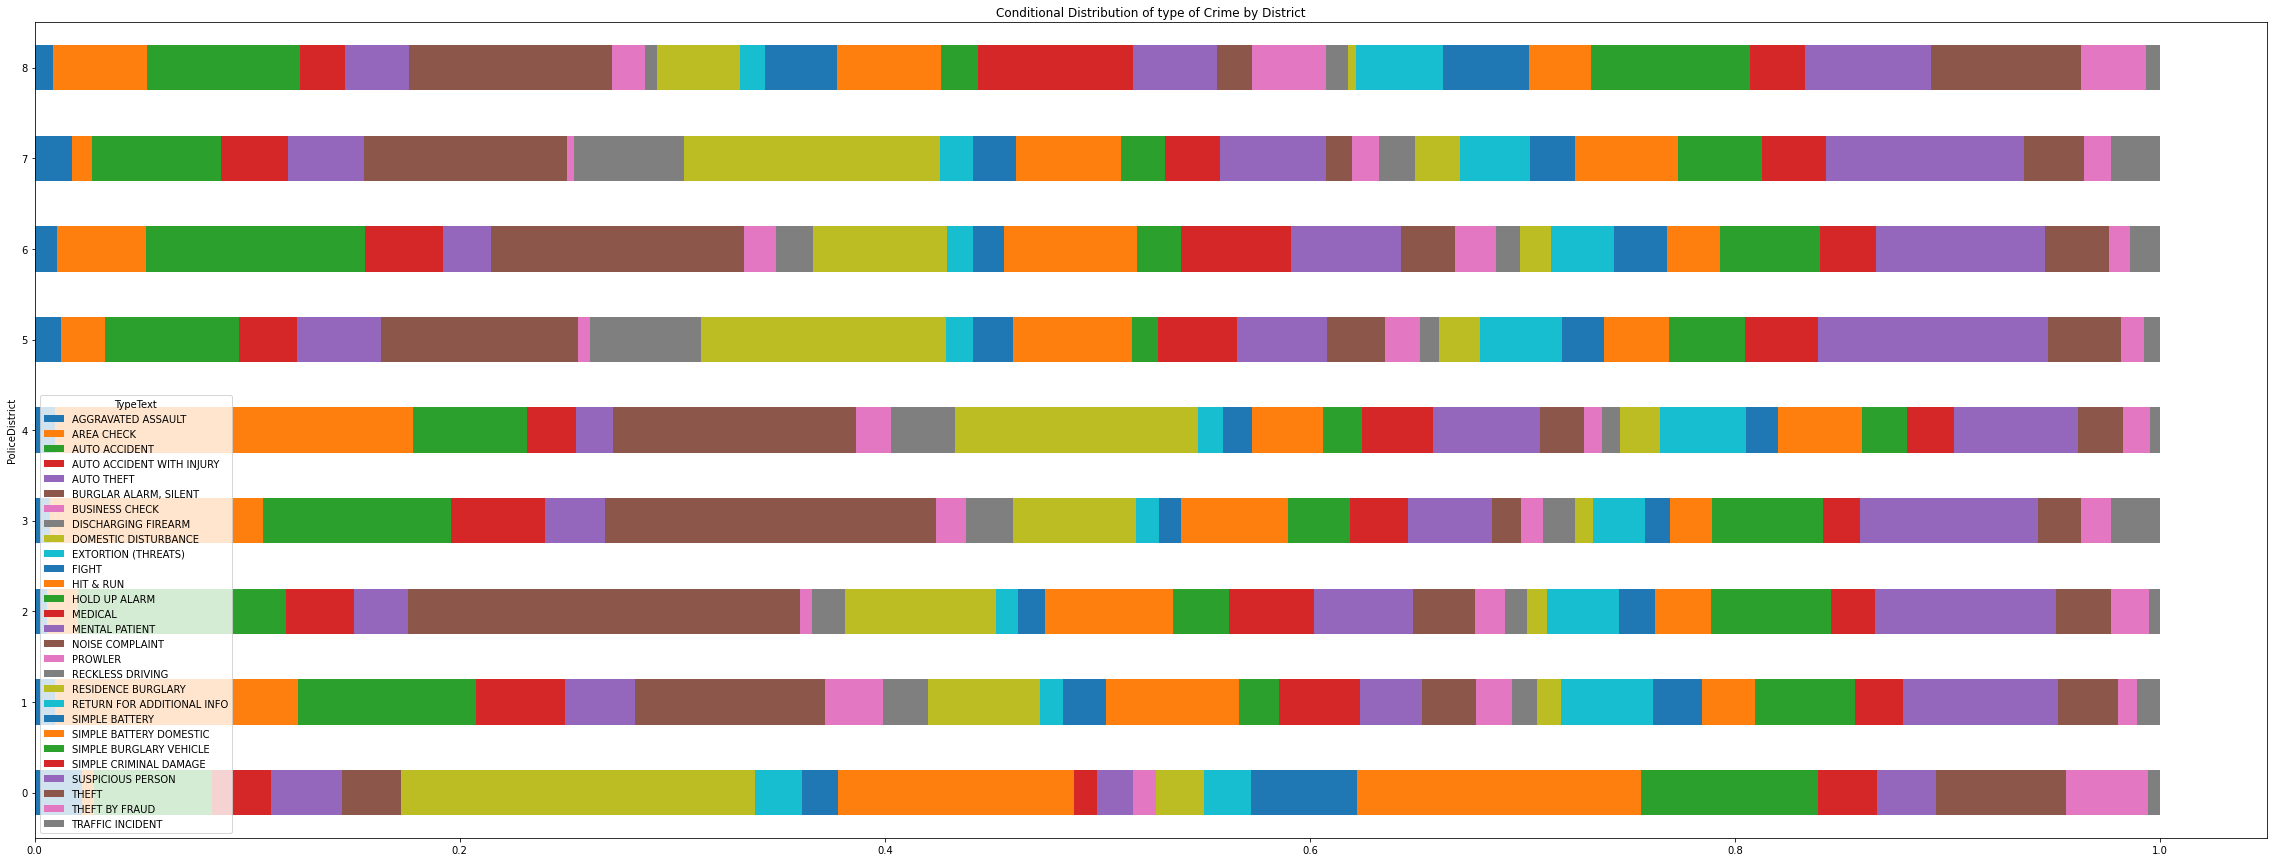

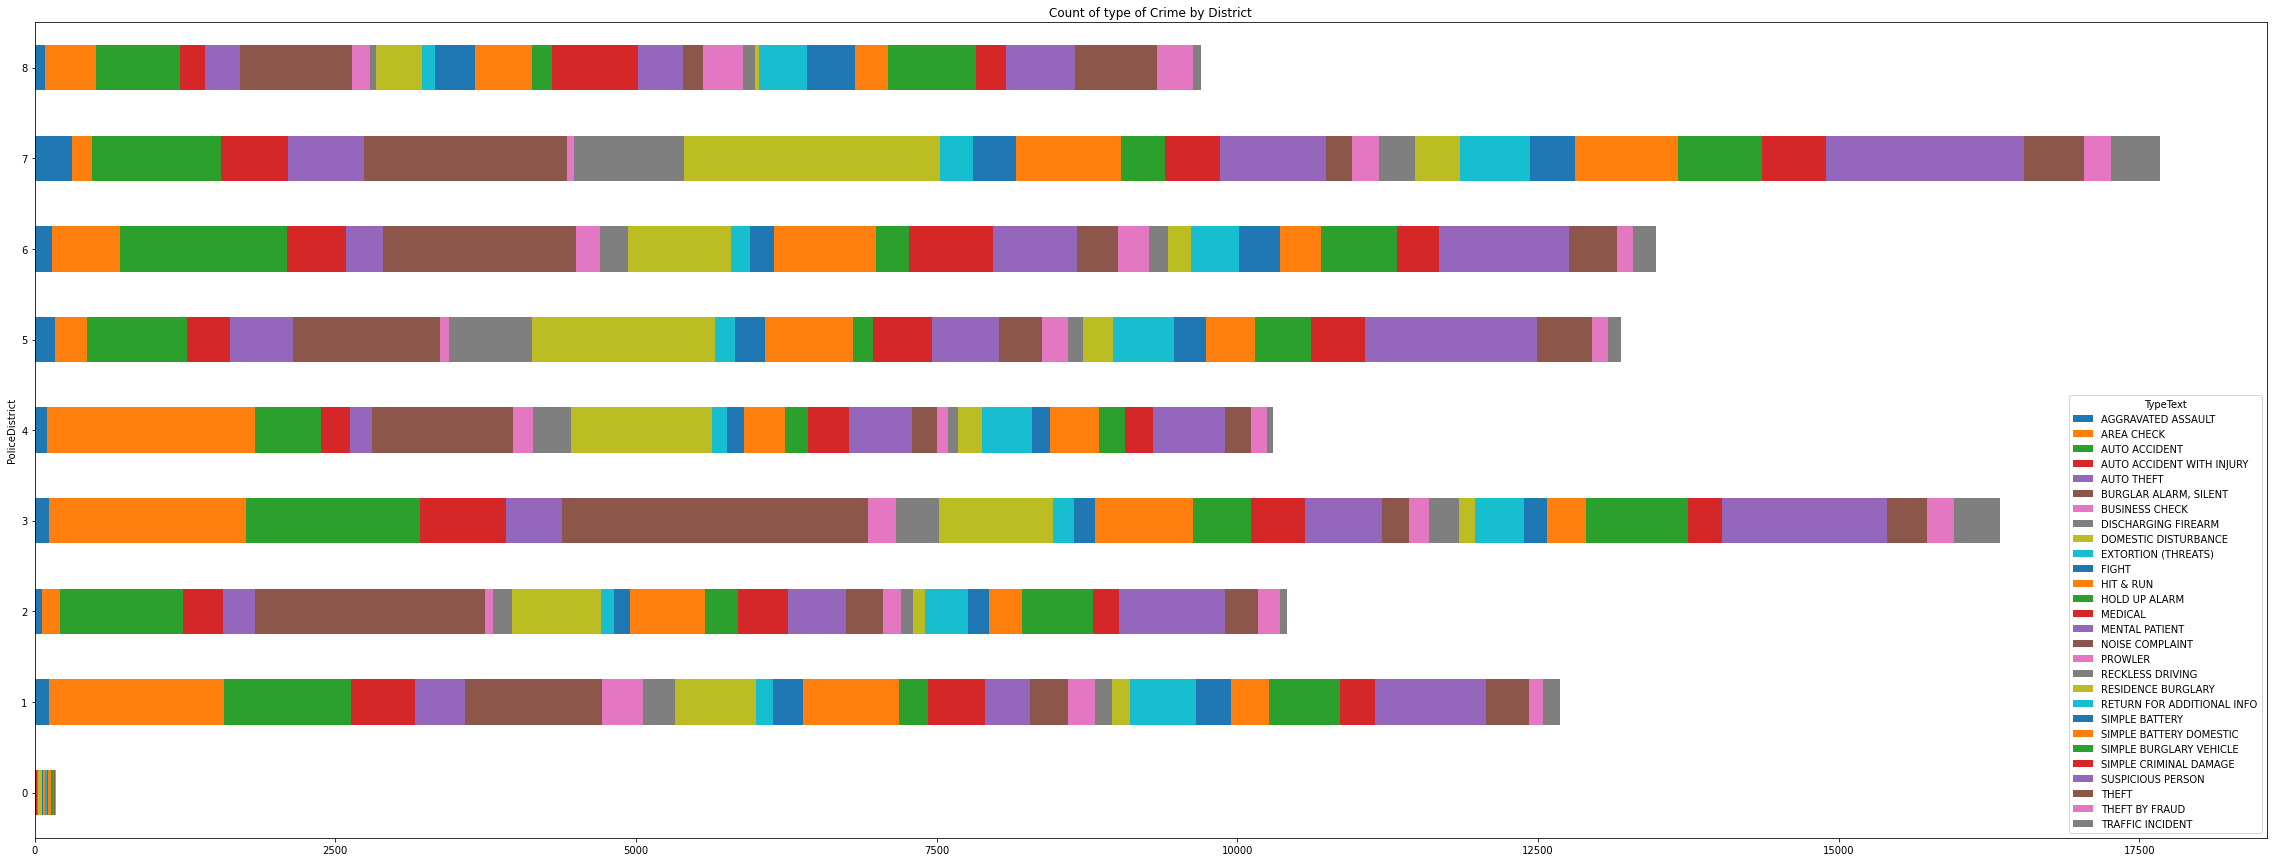

In [20]:
df_Calls_crossTab = pd.crosstab(top_Call_df['PoliceDistrict'],top_Call_df['TypeText'])
display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot.barh(stacked=True, legend=True,figsize=(40,15),title="Conditional Distribution of type of Crime by District"))
df_Calls_crossTab.plot.barh(stacked=True, legend=True,figsize=(40, 15),title="Count of type of Crime by District")

The first graph above is the Conditional Distribution of type of Crime by District. The conditional distribution is the probability of a crime type happening in a district. The conditional distribution is calculated by taking the number of crimes of a certain type in a district and dividing it by the total number of crimes in that district.


The second graph above is the Count of type of Crime by District. The count is the number of crimes of a certain type in a district.


Most Frequent Crimes by Zipcode:
Zip
70112            AUTO ACCIDENT
70113            AUTO ACCIDENT
70114               AREA CHECK
70115    BURGLAR ALARM, SILENT
70116    BURGLAR ALARM, SILENT
70117     DOMESTIC DISTURBANCE
70118    BURGLAR ALARM, SILENT
70119               AREA CHECK
70122    BURGLAR ALARM, SILENT
70124    BURGLAR ALARM, SILENT
70125    BURGLAR ALARM, SILENT
70126     DOMESTIC DISTURBANCE
70127     DOMESTIC DISTURBANCE
70128     DOMESTIC DISTURBANCE
70129     DOMESTIC DISTURBANCE
70130    BURGLAR ALARM, SILENT
70131    BURGLAR ALARM, SILENT
70148            AUTO ACCIDENT
dtype: object


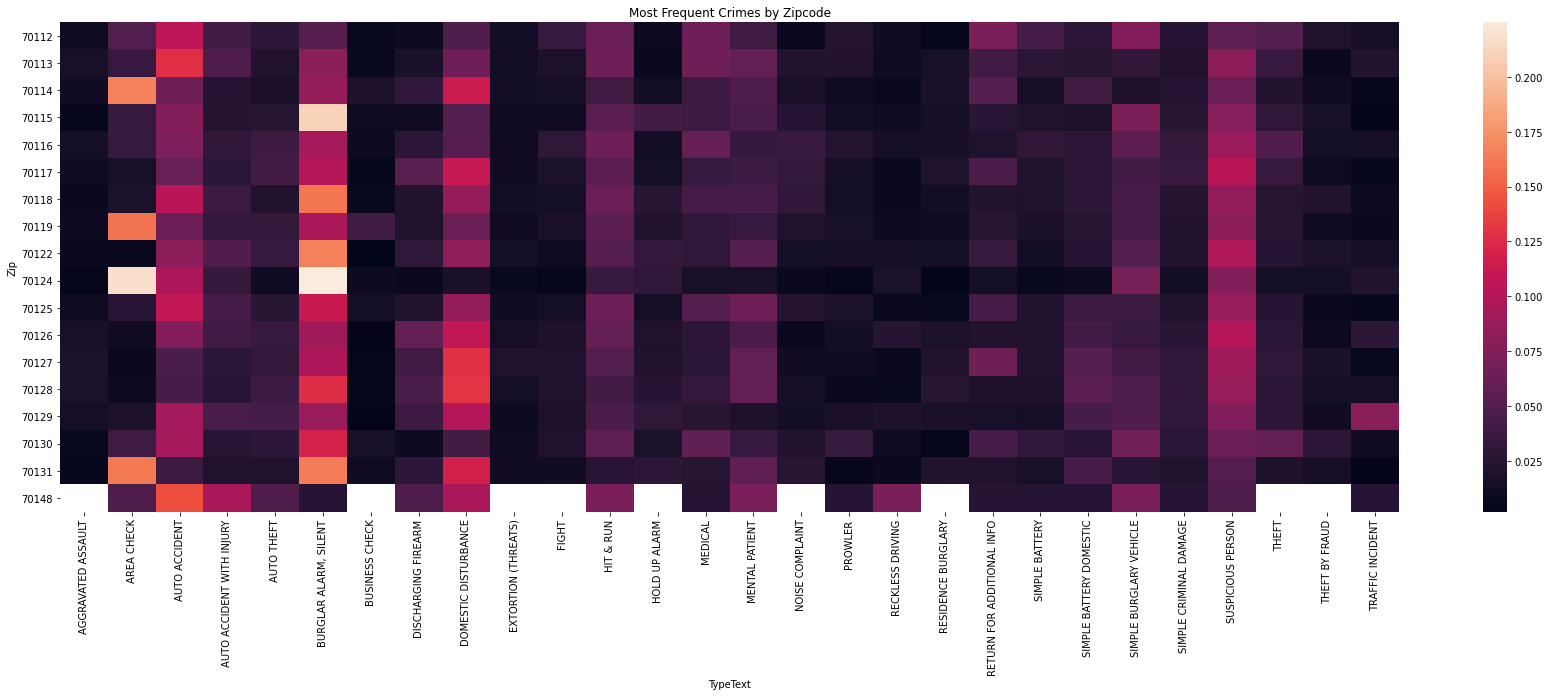

In [21]:
ax = plt.subplots(figsize=(30,9))
plt.title("Most Frequent Crimes by Zipcode")
print("Most Frequent Crimes by Zipcode:")
print(pop_zip)
heat_map_zipcodes_marginal = sns.heatmap(df_Calls_marg_zip.T)

The graph above is showing the conditional distribution of types of crime by zipcode, displayed in a heatmap.
This could be a good metric to work with as we analyze the types of crimes and the distribution of crimes in each zipcode.

<AxesSubplot:title={'center':'Conditional Distribution of type of Crime by Zipcode'}, ylabel='Zip'>

<AxesSubplot:title={'center':'Count of type of Crime by Zipcode'}, ylabel='Zip'>

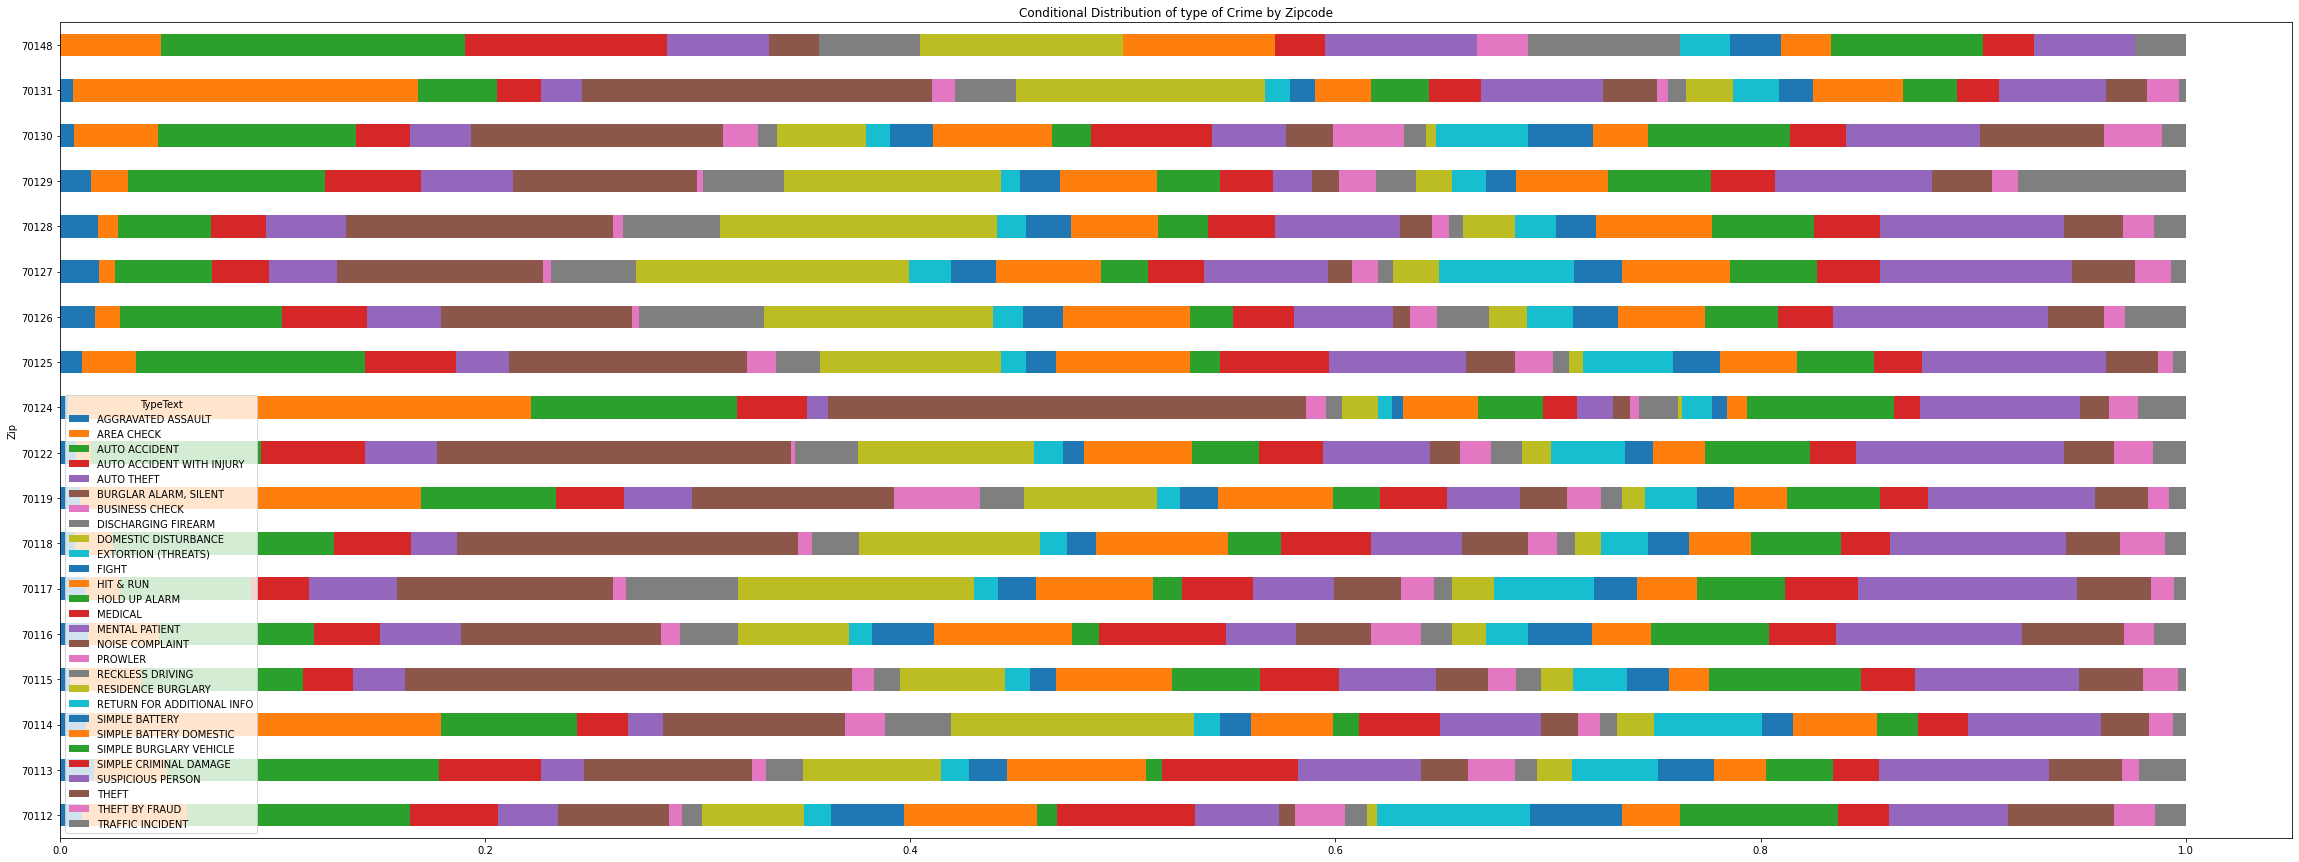

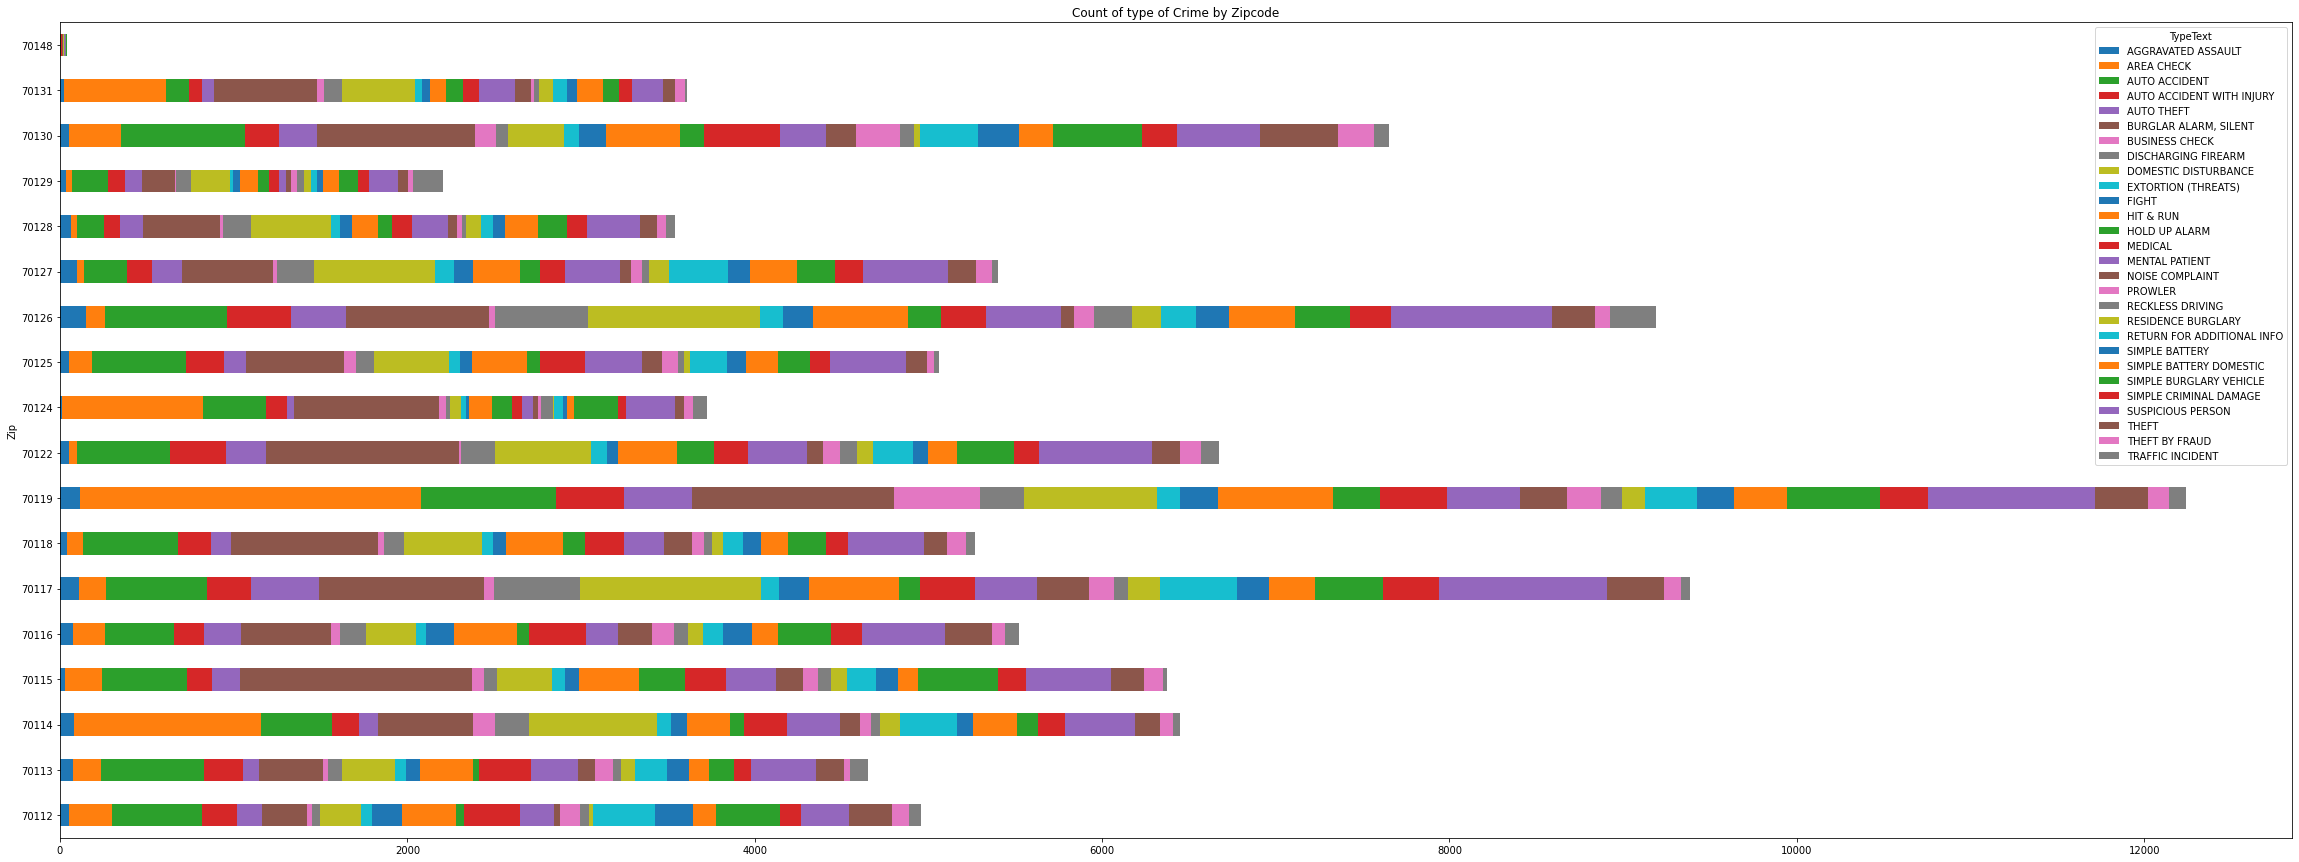

In [22]:
df_Calls_crossTab = pd.crosstab(top_Call_df['Zip'],top_Call_df['TypeText'])
display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot.barh(stacked=True, legend=True,figsize=(40,15),title="Conditional Distribution of type of Crime by Zipcode"))
df_Calls_crossTab.plot.barh(stacked=True, legend=True,figsize=(40, 15),title="Count of type of Crime by Zipcode")

The first graph above is the Conditional Distribution of type of Crime by Zipcode. The conditional distribution is the probability of a crime type happening in a Zipcode. The conditional distribution is calculated by taking the number of crimes of a certain type in a Zipcode and dividing it by the total number of crimes in that Zipcode.
The second graph above is the Count of type of Crime by Zipcode. The count is the number of crimes of a certain type in a Zipcode.


**Census Level Data by Zipcode**

The below data is taken from [https://data.census.gov/](https://data.census.gov/) and we have taken certain statistics from the data set that we think would work well for our analysis. These include income, health care coverage, unemployment, and education.
A scraping bot is being built top scrape the data from the site, but for now we have taken the numbers from the site and manually entered them.

In [ ]:
#BOT CODE
'''from bs4 import BeautifulSoup as bf
import requests_html as reqHtml
zip_range = df_Calls.Zip.unique()

baseUrl = "https://data.census.gov/cedsci/all?q=ZCTA5"
space_ele = "%20"
income = []
health = []
employment =[]
education = []

requ_Variables = [("Income%20and%20Poverty",income),("%20Health",health),("%20employment",employment),("%20Education",education)]
browser = reqHtml.AsyncHTMLSession()
for zipcodeBase in zip_range:
    for requ_Variable in requ_Variables:
            info = browser.get(baseUrl+space_ele+zipcodeBase+space_ele+requ_Variable[0])  
            print(info)
            #info.html.render()
            parse_HTML = info.page_source
            print(parse_HTML)
            soup = bf(parse_HTML,"html.parser")
            result = soup.find("div",class_="aqua-card-title-text")
            result = result.text
            requ_Variable[1].append(result)'''

####END TEMPORARY BOT CODE

'''print(['70124', '70115', np.nan, '70131', '70126', '70114', '70117', '70116', '70113',
 '70119', '70112', '70122', '70127', '70130', '70128', '70118', '70125', np.nan
 ,'70129', '70148'])'''



In this dataframe we put together the percent of education bachelors or higher, the percent of employment, mean gross income per capita, and percent without healthcare coverage. This data, organized by zip code, will allow us to associate these demographic features with different regions that experience a high rate of crime, a prevalence of a certain type of crime, or a long response time

**Our Models**
We plan to continue working on this project and expand our analysis to develop a predicitve model of which areas in the parish will get what kind of calls (violent crime, theft, vandalism etc.), when the calls will come in (based on the observed most common time of day for that crime), and what the response time of that kind of call would likely be. This data can help not only establish patterns that would help law enforcement target certain kinds of crime, but would also point towards any district in particular where preparedness needs to be increased (if an area's mean response time significantly deviates from the standard, for example).

Another model we are planning on making is analyzing the cross between the type of crime / frequency to income and other related fields by zipcodes avaible in the 911 call data set. After analyzing the crossing of data, we hope to find a line or certain characteristics that make some zipcodes more likely to be involved in certain types of crimes. With this "line" or characteristcs, we can then predict the likelihood of a zipcode being involved in a certain type of crime, and be able to tell when zipcodes are creeping towards that line/ ways to escape and improve.

# MODELING

In [23]:
routine_noncriminal = ["AUTO ACCIDENT", "AUTO ACCIDENT WITH INJURY", "BUSINESS CHECK", 'DIRECTED PATROL', 
                       'DISTURBANCE (OTHER)', "MEDICAL", 'MENTAL PATIENT', 'NOISE COMPLAINT', 'RETURN FOR ADDITIONAL INFO',
                       'SUSPICIOUS PERSON', 'TRAFFIC INCIDENT', 'TRAFFIC STOP', 'TOW IMPOUNDED VEHICLE (PRIVATE)',
                       'TRAFFIC STOP']

violent_crime = ['FIGHT', 'HIT & RUN', 'SIMPLE BATTERY', 'SIMPLE BATTERY DOMESTIC']
nonviolent_crime = ['SIMPLE BURGLARY VEHICLE', 'THEFT BY FRAUD', 'SIMPLE CRIMINAL DAMAGE']

potentially_violent_crime = ['THEFT', 'BURGLAR ALARM, SILENT', 'DISCHARGING FIREARM', 'AUTO THEFT', 'HOLD UP ALARM',
                             'RECKLESS DRIVING', 'DOMESTIC DISTURBANCE'] 

top_Call_df['typeCall'] = np.nan
rankDict = {"AUTO ACCIDENT": 9,
            "AUTO ACCIDENT WITH INJURY": 10, 
            "BUSINESS CHECK": 1, 
            'DIRECTED PATROL': 2, 
            'DISTURBANCE (OTHER)': 11, 
            "MEDICAL": 13, 
            'MENTAL PATIENT': 12, 
            'NOISE COMPLAINT': 3, 
            'RETURN FOR ADDITIONAL INFO': 8,
            'SUSPICIOUS PERSON': 14,
            'TRAFFIC INCIDENT': 7, 
            'TRAFFIC STOP': 5,
            'TOW IMPOUNDED VEHICLE (PRIVATE)': 4,
            'TRAFFIC STOP': 6,                      
            'FIGHT': 28,
            'HIT & RUN': 25,
            'SIMPLE BATTERY': 27,
            'SIMPLE BATTERY DOMESTIC': 26,
            'SIMPLE BURGLARY VEHICLE': 15,
            'THEFT BY FRAUD': 16,
            'SIMPLE CRIMINAL DAMAGE': 17,
            'THEFT': 24,
            'BURGLAR ALARM, SILENT': 23, 
            'DISCHARGING FIREARM': 22,
            'AUTO THEFT': 21,
            'HOLD UP ALARM': 20,
            'RECKLESS DRIVING': 18,
            'DOMESTIC DISTURBANCE': 19
    
    
}
top_Call_df["typeCall"] = top_Call_df.TypeText.map(lambda x: 'routine_noncriminal' if (x in routine_noncriminal) else 'violent_crime' if (x in violent_crime) else 'nonviolent_crime' if (x in nonviolent_crime) else 'potentially_violent_crime' if (x in potentially_violent_crime) else "other")
top_Call_df["typeRank"] = top_Call_df.TypeText.map(rankDict)
top_Call_df["typeBasicRank"] = top_Call_df.TypeText.map(lambda x: 0 if (x in routine_noncriminal) else 3 if (x in violent_crime) else 1 if (x in nonviolent_crime) else 2 if (x in potentially_violent_crime) else np.nan)
top_Call_df

,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,...,Income,Health,Employment,Education,typeCall,typeRank,Hour,TimeOfDay,responseSeconds,typeBasicRank
0,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,...,66499.0,7.2,66.1,60.4,potentially_violent_crime,23.0,0,Afternoon,242,2.0
1,FIGHT,2D,FIGHT,2D,2021-01-01 00:18:32,2021-01-01 01:45:23,2021-01-01 01:49:07,2021-01-01 01:56:15,GONE ON ARRIVAL,N,...,66499.0,7.2,66.1,60.4,violent_crime,28.0,0,Afternoon,224,3.0
2,"BURGLAR ALARM, SILENT",2E,"BURGLAR ALARM, SILENT",2E,2021-01-01 03:46:26,2021-01-01 03:48:02,2021-01-01 03:52:11,2021-01-01 04:03:06,Necessary Action Taken,N,...,66499.0,7.2,66.1,60.4,potentially_violent_crime,23.0,3,Afternoon,249,2.0
3,MENTAL PATIENT,2C,MENTAL PATIENT,2C,2021-01-01 03:48:49,2021-01-01 03:52:19,2021-01-01 03:53:44,2021-01-01 05:07:19,Necessary Action Taken,N,...,66499.0,7.2,66.1,60.4,routine_noncriminal,12.0,3,Afternoon,85,0.0
4,SIMPLE BURGLARY VEHICLE,1G,SIMPLE BURGLARY VEHICLE,1G,2021-01-01 09:44:45,2021-01-01 09:53:42,2021-01-01 10:14:09,2021-01-01 10:19:32,REPORT TO FOLLOW,N,...,66499.0,7.2,66.1,60.4,nonviolent_crime,15.0,9,Morning,1227,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103948,HIT & RUN,1A,HIT & RUN,1G,2021-01-31 03:32:22,2021-01-31 03:36:11,2021-01-31 03:54:29,2021-01-31 04:53:03,REPORT TO FOLLOW,N,...,NaN,NaN,56.5,NaN,violent_crime,25.0,3,Afternoon,1098,3.0
103949,AREA CHECK,1K,AREA CHECK,1K,2021-02-01 01:34:38,2021-02-01 01:34:38,2021-02-01 01:34:46,2021-02-01 02:24:41,Necessary Action Taken,N,...,NaN,NaN,NaN,NaN,other,NaN,1,Afternoon,8,NaN
103950,AREA CHECK,1K,AREA CHECK,1K,2021-02-01 01:34:38,2021-02-01 01:34:38,2021-02-01 01:34:46,2021-02-01 02:24:41,Necessary Action Taken,N,...,NaN,NaN,56.5,NaN,other,NaN,1,Afternoon,8,NaN
103951,AUTO ACCIDENT,1A,AUTO ACCIDENT,1E,2021-02-01 09:44:29,2021-02-01 10:49:02,2021-02-01 11:10:22,2021-02-01 11:19:25,DUPLICATE,N,...,NaN,NaN,NaN,NaN,routine_noncriminal,9.0,9,Morning,1280,0.0


In [24]:
time_of_day = top_Call_df.TimeCreate.dt.hour
top_Call_df['Hour'] = time_of_day
top_Call_df['TimeOfDay'] =top_Call_df.Hour.map(lambda x: 'Morning' if (x< 12 and x>5) else 'Afternoon' if x < 18 else 'Evening/Night')
top_Call_df['TimeOfDay']
top_Call_df.groupby('TypeText').TimeOfDay.value_counts()

TypeText            TimeOfDay    
AGGRAVATED ASSAULT  Afternoon         537
                    Evening/Night     324
                    Morning           253
AREA CHECK          Afternoon        3205
                    Evening/Night    1914
                                     ... 
THEFT BY FRAUD      Morning           464
                    Evening/Night     202
TRAFFIC INCIDENT    Afternoon         638
                    Evening/Night     464
                    Morning           290
Name: TimeOfDay, Length: 84, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


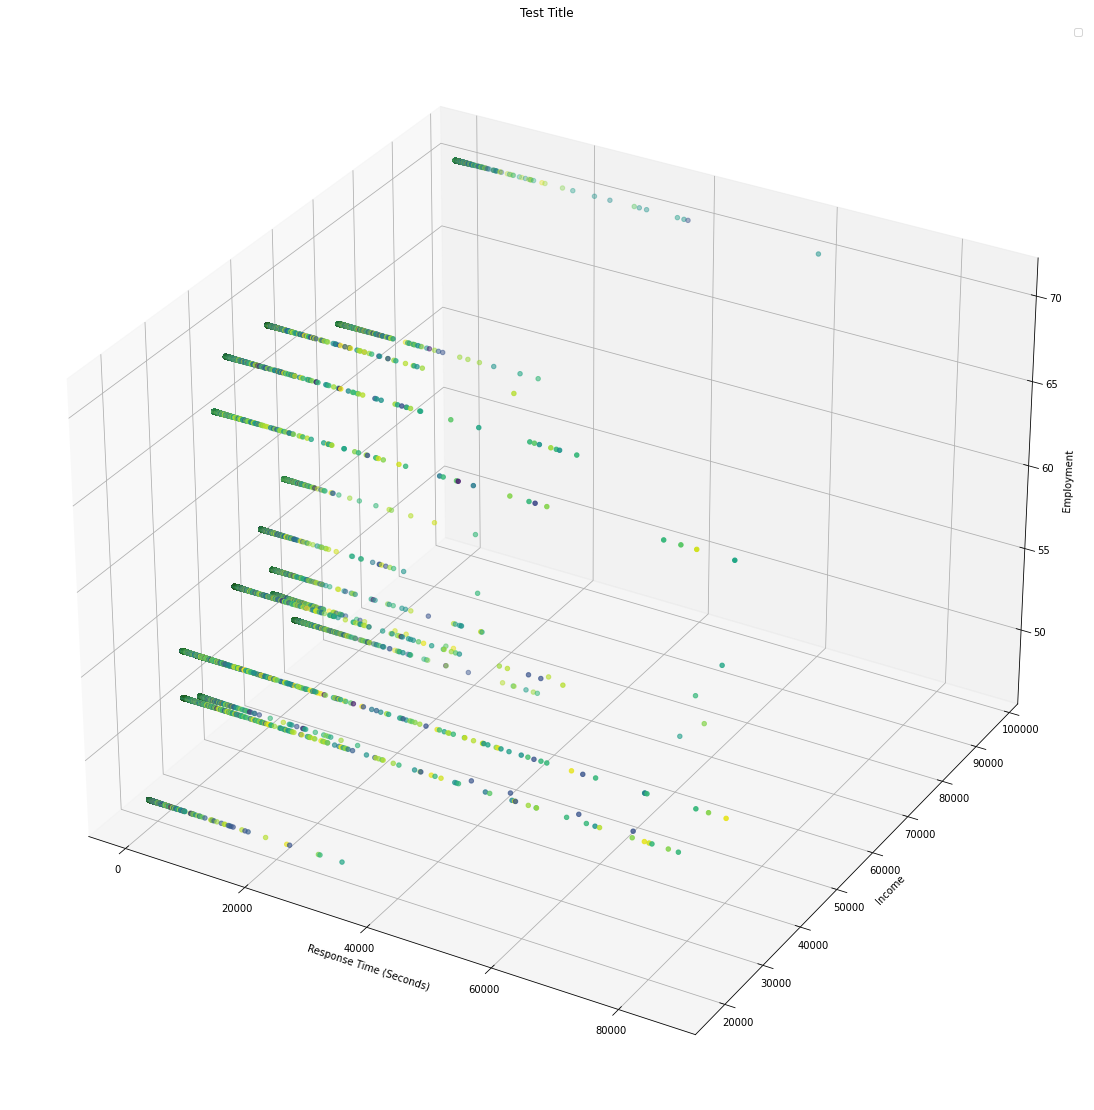

In [25]:
#using Axes3D, plot the 3D graph of the crime rate by zipcode
fig = plt.figure(figsize=(30,15))
ax = Axes3D(fig)

view_3d_df = top_Call_df.groupby(['Zip','TimeOfDay']).TypeText.value_counts().unstack()



y = top_Call_df.Income
x = top_Call_df.responseSeconds
z = top_Call_df.Employment
c = top_Call_df.typeRank
ax.scatter(x,y,z,c=c,cmap='viridis')
plt.title('Test Title')
ax.set_ylabel('Income')
ax.set_xlabel('Response Time (Seconds)')
ax.set_zlabel('Employment')
plt.legend()


In [31]:
# PLOT FUNCTION
def plot_regress(data):
    k= -1
    fig,ax = plt.subplots(6, 5, figsize=(30,100))
    for i in data.columns:
        k+=1
        m = -1
        for j in data.columns:
            if i==j:
                continue
            else:
                m+=1
                sns.regplot(x=data[j], y=data[i],scatter_kws={'alpha':0.5},ax=ax[k][m],marker='x')
def get_avgs(data,groupby):
    view_3d_df = data.groupby(groupby)
    seconds_avg = view_3d_df.responseSeconds.mean()
    income_avg = view_3d_df.Income.mean()
    employment_avg = view_3d_df.Employment.mean()
    type_avg = view_3d_df.typeRank.mean()
    health_avg = view_3d_df.Health.mean()
    edu_avg = view_3d_df.Education.mean()

    avg_df = pd.DataFrame({'Seconds':seconds_avg, 'Income':income_avg, 'Employment':employment_avg, 'typeRank':type_avg, 'Health':health_avg, 'Education':edu_avg})
    return avg_df
    

# BY ZIPCODE and CRIME TYPE

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


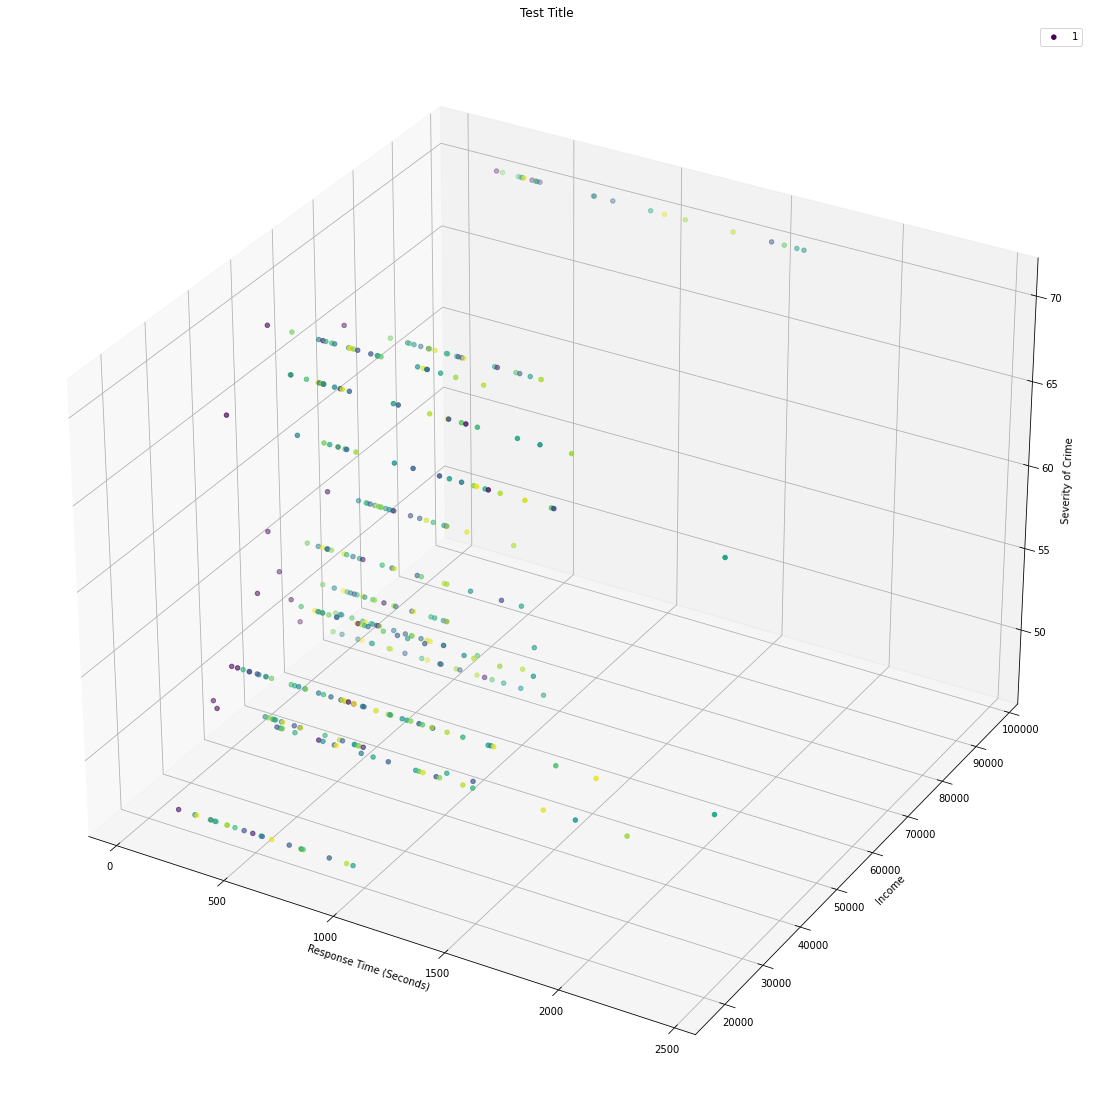

In [30]:
fig = plt.figure(figsize=(30,15))
ax = Axes3D(fig)
view_3d_df = top_Call_df.groupby(['Zip','typeRank'])
seconds_avg = view_3d_df.responseSeconds.mean()
income_avg = view_3d_df.Income.mean()
employment_avg = view_3d_df.Employment.mean()
type_avg = view_3d_df.typeRank.mean()
health_avg = view_3d_df.Health.mean()
edu_avg = view_3d_df.Education.mean()

avg_df_zip_type = pd.DataFrame({'Seconds':seconds_avg, 'Income':income_avg, 'Employment':employment_avg, 'typeRank':type_avg, 'Health':health_avg, 'Education':edu_avg})

ax.scatter(seconds_avg , income_avg ,employment_avg,c=type_avg,cmap='viridis')
plt.title('Test Title')
ax.set_ylabel('Income')
ax.set_xlabel('Response Time (Seconds)')
ax.set_zlabel('Severity of Crime')
ax.legend({1:'not severe',2:'moderate',3:'severe',4:'very severe'})

No handles with labels found to put in legend.


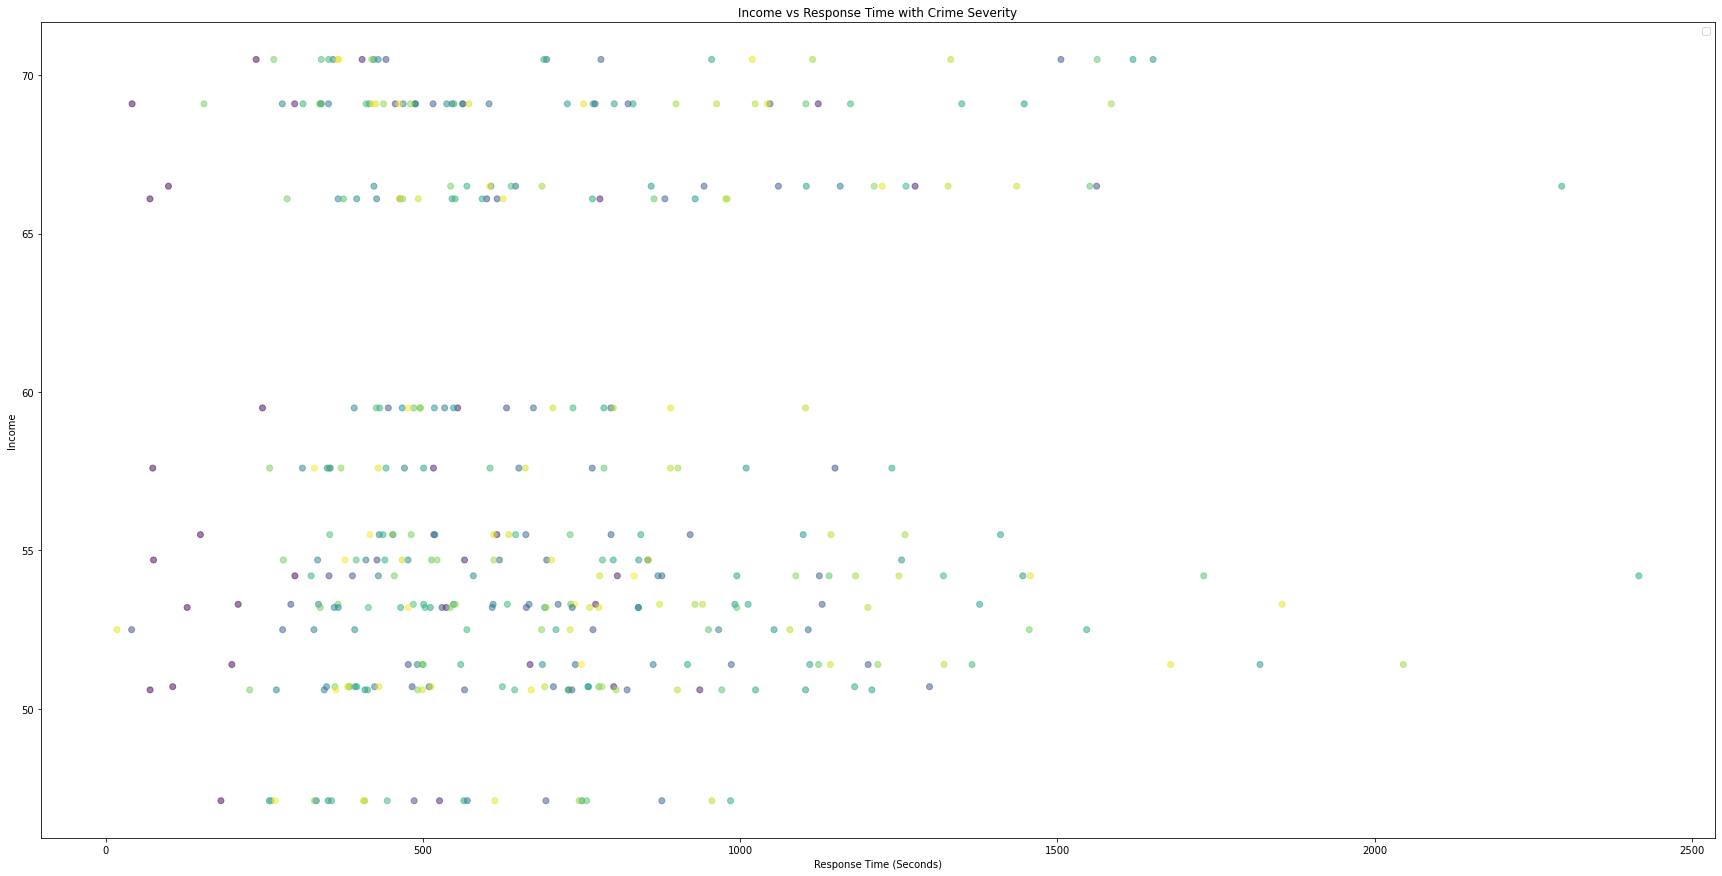

In [27]:
fig = plt.figure(figsize=(30,15))
plt.scatter(x=seconds_avg , y=employment_avg ,c=type_avg,cmap='viridis',alpha=0.5)
plt.ylabel('Income')
plt.xlabel('Response Time (Seconds)')
plt.title('Income vs Response Time with Crime Severity')
plt.legend()

In [ ]:
#sns.regplot(x=seconds_avg, y=type_avg,scatter_kws={'alpha':0.5})

<AxesSubplot:xlabel='Seconds', ylabel='Income'>

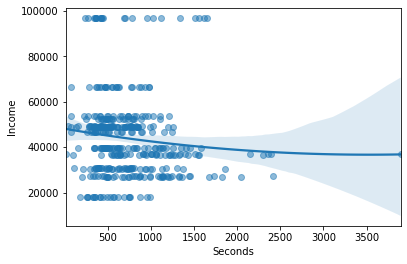

In [28]:
sns.regplot(x=avg_df_zip_type['Seconds'], y=avg_df_zip_type['Income'],scatter_kws={'alpha':0.5},order=2)

This above graph illustrates the response time in seconds in relation to average income for a zip code, with a regression line drawn through it.

In [ ]:
#plot_regress(avg_df_zip_type)

# BY DISTRICT

In [32]:
avg_by_District = get_avgs(top_Call_df,'PoliceDistrict')
#plot_regress(avg_by_Disrict)

# BY DISTRICT AND TYPE OF CRIME

In [33]:
by_District_type = get_avgs(top_Call_df,['PoliceDistrict','typeRank'])
#plot_regress(by_Zone_type)

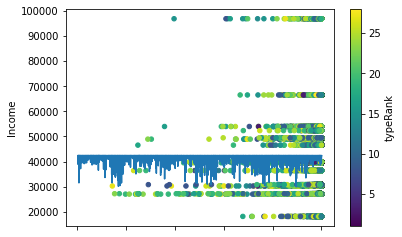

In [34]:
test_df = top_Call_df
test_df.dropna(inplace=True)
z = np.polyfit(x=test_df['responseSeconds'], y=test_df['Income'],deg=1)
p = np.poly1d(z)
line = p(test_df['responseSeconds'])
test_df['Trendline_1'] = line
ax = test_df.plot.scatter(x='responseSeconds',y='Income',c='typeRank',cmap='viridis')
test_df['Trendline_1'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()

# BY DISTRICT AND INCOME

In [35]:
by_District_inc = get_avgs(top_Call_df,['PoliceDistrict','Income'])
#plot_regress(by_District_inc)

<AxesSubplot:title={'center':'Mean Response Times by District and Severity of Call'}, ylabel='PoliceDistrict'>

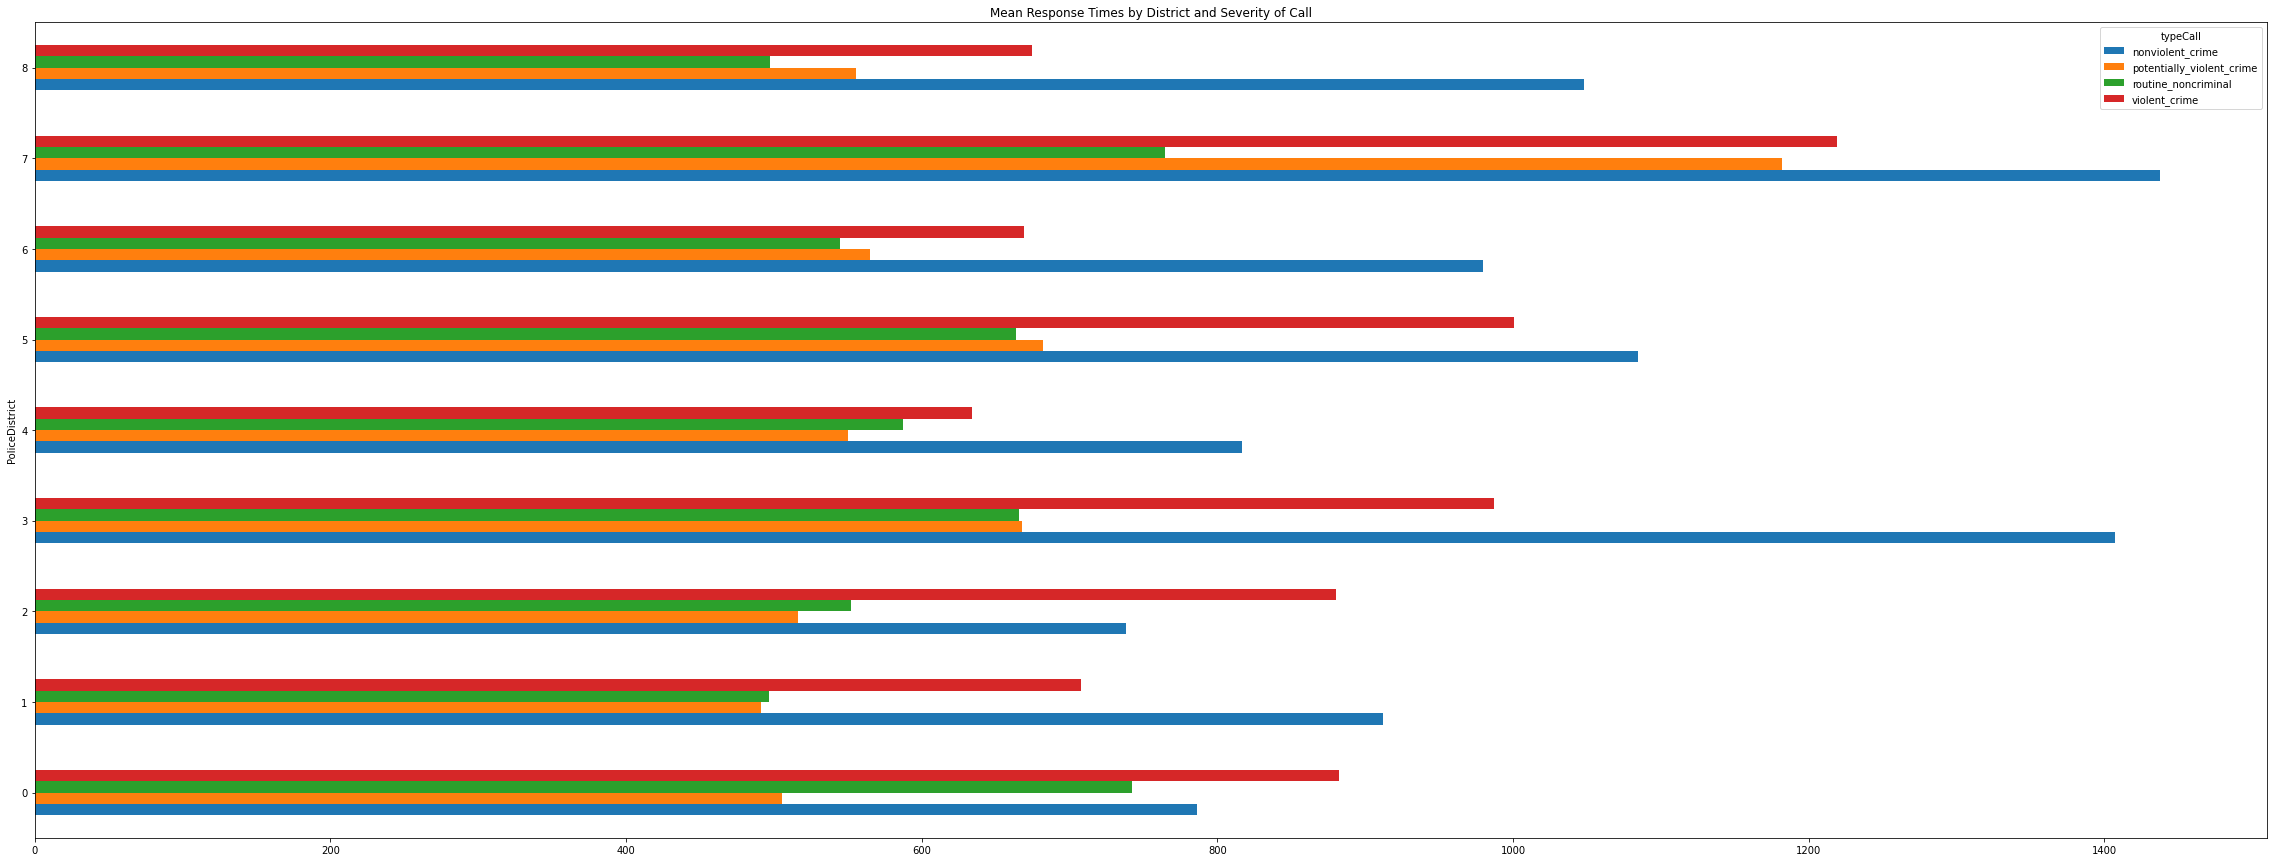

In [36]:
resp_by_type_and_district = top_Call_df.groupby(['PoliceDistrict','typeCall']).responseSeconds.mean().unstack()
resp_by_type_and_district.plot.barh(stacked=False, legend=True, figsize=(40,15), title="Mean Response Times by District and Severity of Call")

<AxesSubplot:title={'center':'Conditional Distribution of Severity of Crime by District'}, ylabel='PoliceDistrict'>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 2 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 3 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-leg

<AxesSubplot:title={'center':'Crime Severities Count by District'}, ylabel='PoliceDistrict'>

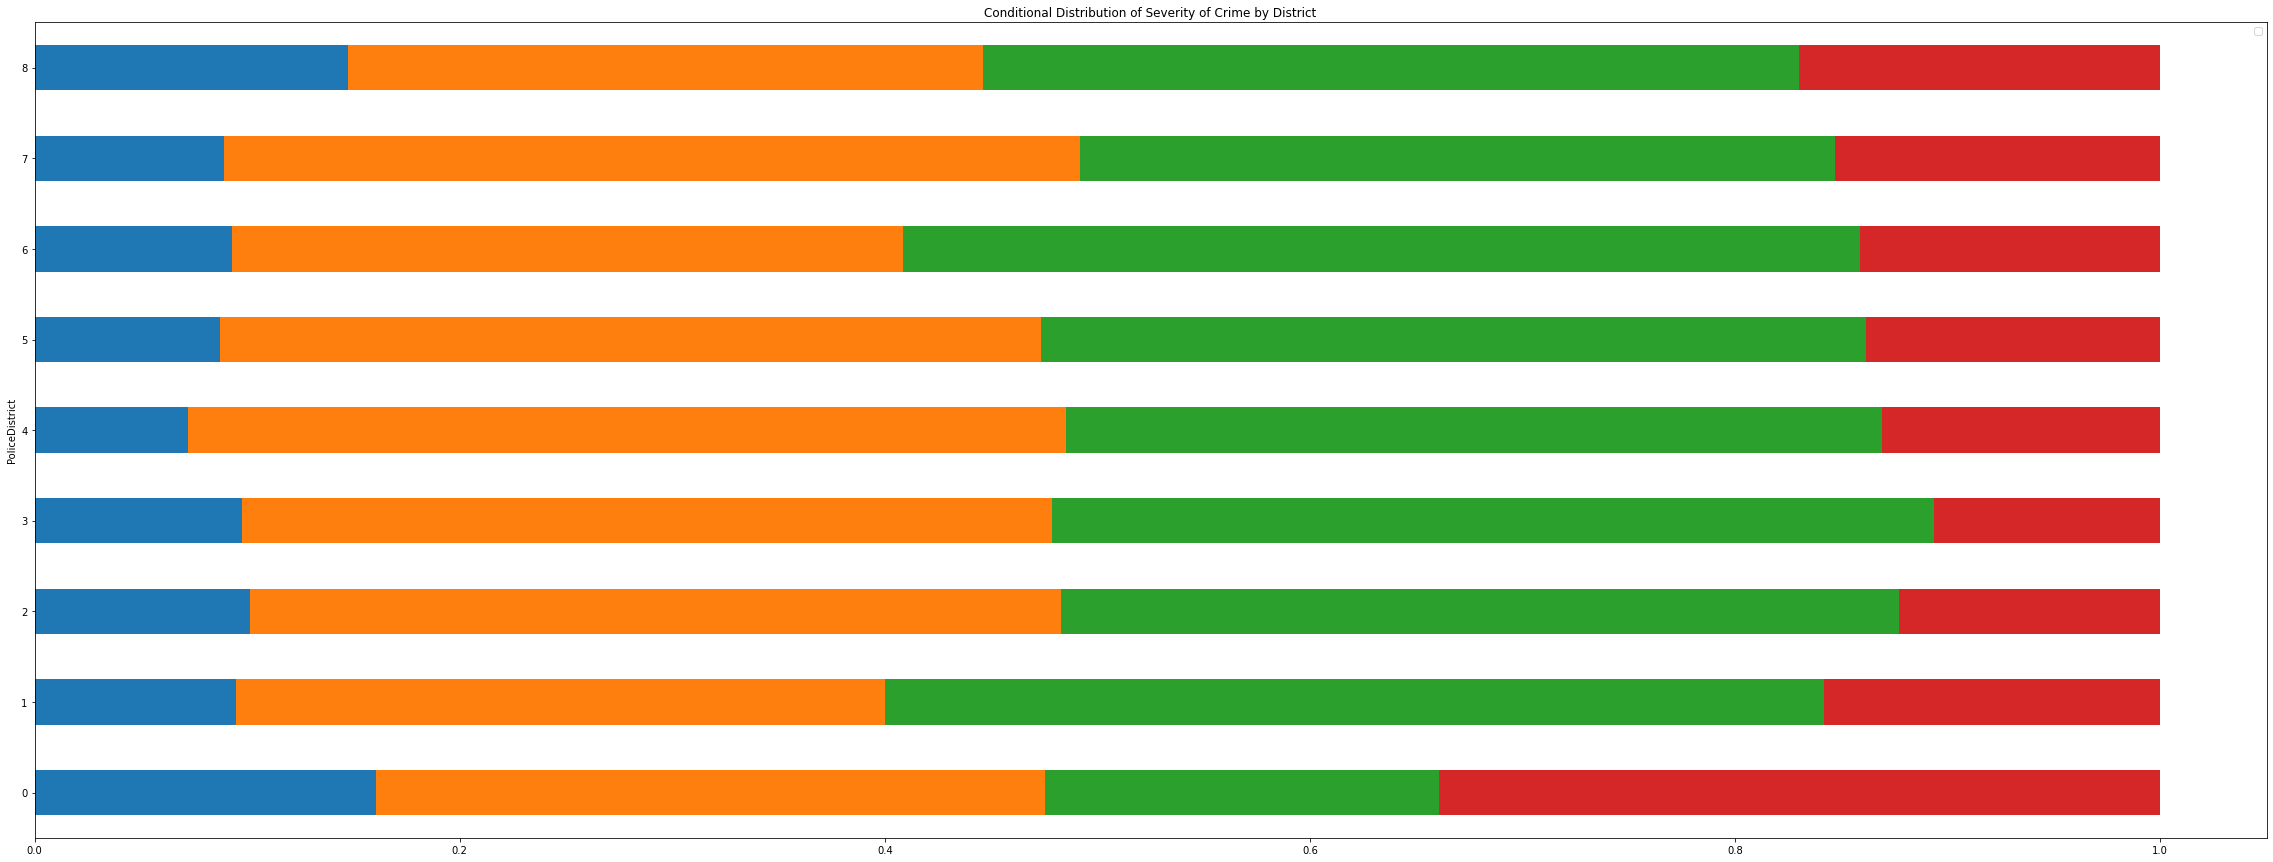

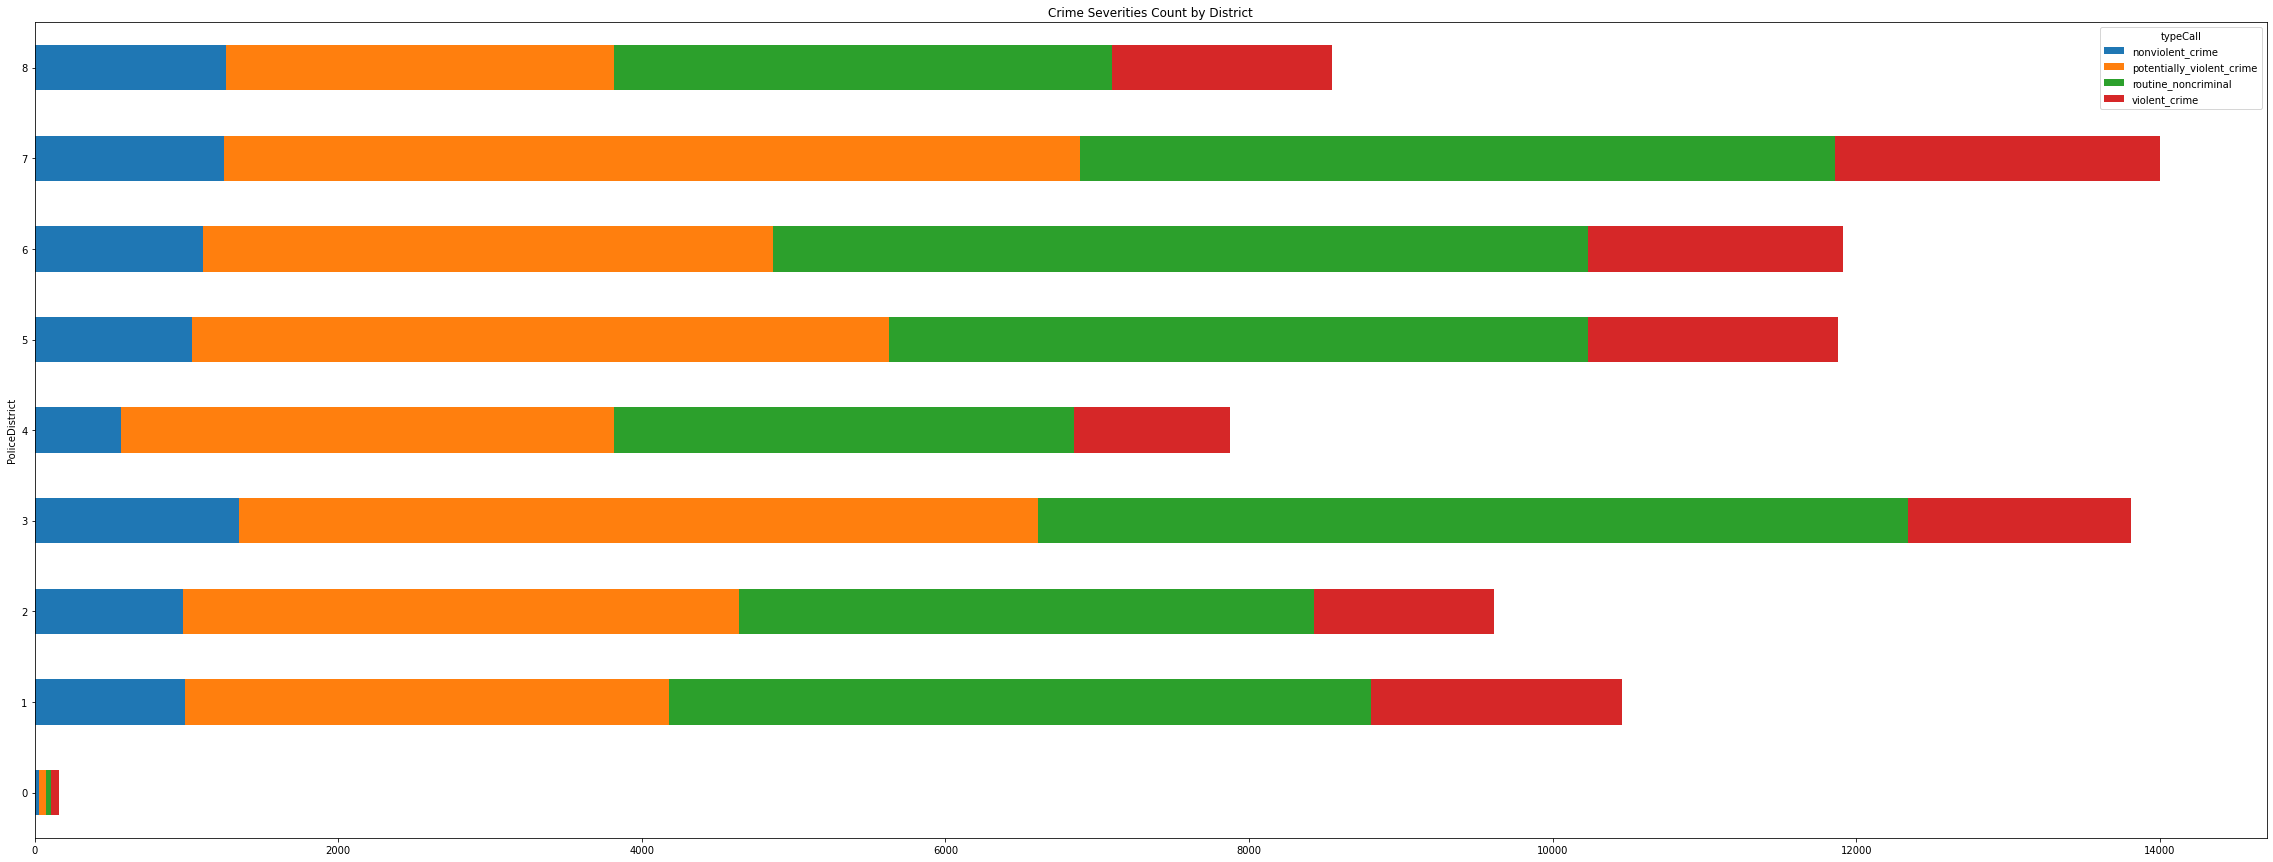

In [37]:
df_calls_top_district_typeRank = pd.crosstab(top_Call_df['PoliceDistrict'],top_Call_df['typeCall'])

display((df_calls_top_district_typeRank.T / df_calls_top_district_typeRank.T.sum()).T.plot.barh(stacked=True, legend=True,figsize=(40,15),title="Conditional Distribution of Severity of Crime by District"))
plt.legend([1,2,3,4],['not severe','moderate','severe','very severe'])
df_calls_top_district_typeRank.plot.barh(stacked=True, legend=True,figsize=(40, 15),title="Crime Severities Count by District")

In [38]:
by_TypeText_zone = get_avgs(top_Call_df,['PoliceDistrict','TypeText'])
by_TypeText_zone
df_calls_top_district_typeRank


typeCall,nonviolent_crime,potentially_violent_crime,routine_noncriminal,violent_crime
PoliceDistrict,,,,
0,26,51,30,55
1,992,3190,4619,1653
2,976,3665,3790,1184
3,1345,5263,5731,1468
4,570,3249,3026,1029
5,1039,4587,4610,1645
6,1109,3758,5363,1682
7,1247,5641,4972,2143
8,1260,2555,3281,1453


<AxesSubplot:xlabel='PoliceDistrict', ylabel='typeCall'>

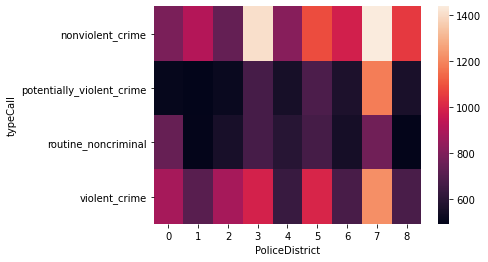

In [39]:
sns.heatmap(resp_by_type_and_district.T)

In [40]:
resp_by_type_crime_and_district = top_Call_df.groupby(['PoliceDistrict','TypeText']).responseSeconds.mean().unstack()


<AxesSubplot:xlabel='PoliceDistrict', ylabel='TypeText'>

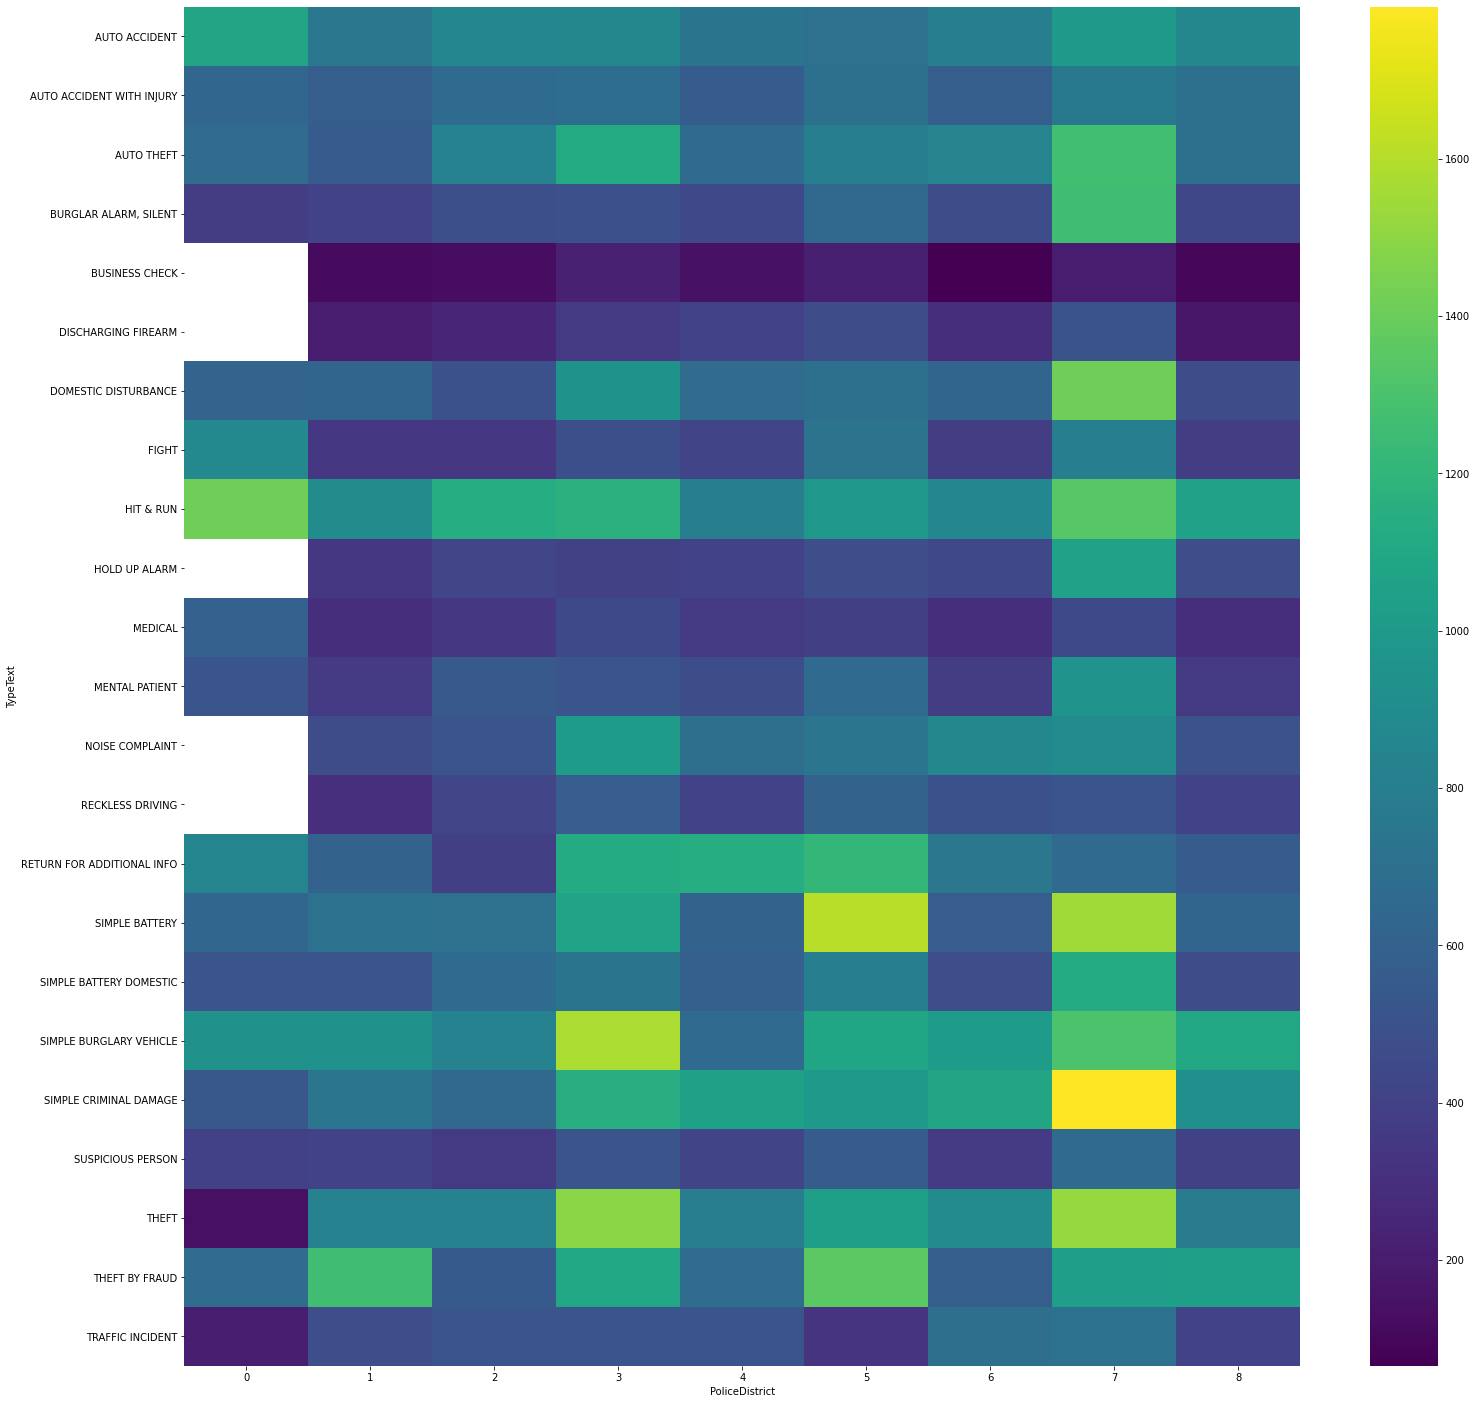

In [41]:
fig,ax = plt.subplots(figsize=(25,25))
sns.heatmap(resp_by_type_crime_and_district.T,ax=ax, cmap='viridis')

<AxesSubplot:xlabel='PoliceDistrict', ylabel='TypeText'>

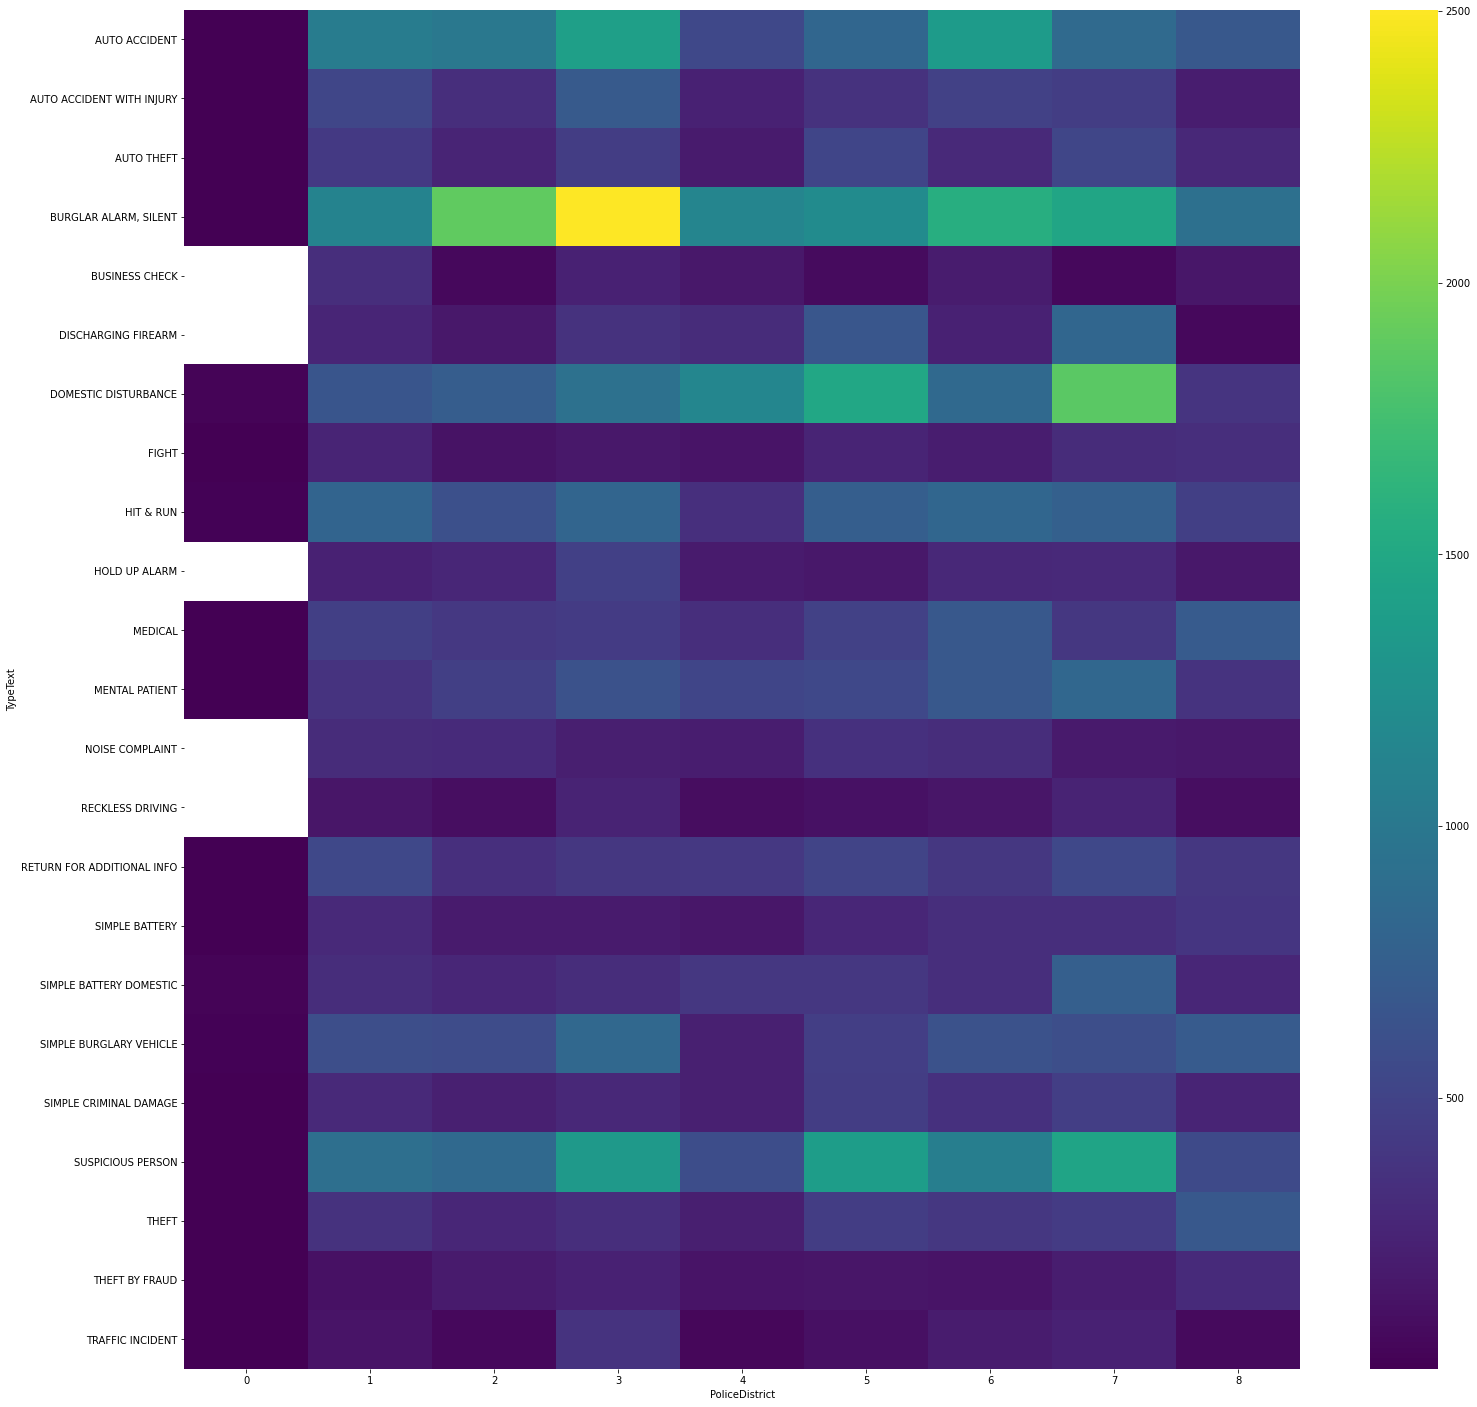

In [42]:
count_by_type_crime_and_district = top_Call_df.groupby(['PoliceDistrict','TypeText']).Income.count().unstack()
fig,ax = plt.subplots(figsize=(25,25))
sns.heatmap(count_by_type_crime_and_district.T,ax=ax, cmap='viridis')


In [43]:
resp_by_type_crime_and_district.head()

TypeText,AUTO ACCIDENT,AUTO ACCIDENT WITH INJURY,AUTO THEFT,"BURGLAR ALARM, SILENT",BUSINESS CHECK,DISCHARGING FIREARM,DOMESTIC DISTURBANCE,FIGHT,HIT & RUN,HOLD UP ALARM,...,RECKLESS DRIVING,RETURN FOR ADDITIONAL INFO,SIMPLE BATTERY,SIMPLE BATTERY DOMESTIC,SIMPLE BURGLARY VEHICLE,SIMPLE CRIMINAL DAMAGE,SUSPICIOUS PERSON,THEFT,THEFT BY FRAUD,TRAFFIC INCIDENT
PoliceDistrict,,,,,,,,,,,,,,,,,,,,,
0,1078.700000,633.800000,669.000000,374.600000,NaN,NaN,617.033333,878.666667,1413.700000,NaN,...,NaN,849.250000,633.333333,518.913043,935.571429,532.800000,391.000000,137.100000,668.714286,209.000000
1,750.257198,576.609195,554.043062,406.581395,114.481928,196.065637,621.954819,336.119048,898.076730,338.676596,...,300.127660,611.188192,708.618557,522.622222,930.711149,739.961938,404.057522,833.329577,1261.504505,474.244444
2,859.910911,665.384146,826.099602,478.233051,122.780000,246.938272,495.695473,337.064000,1136.581433,428.379182,...,428.894737,382.790560,700.779661,664.723881,833.763478,644.435780,361.432783,825.612546,549.836066,522.941176
3,867.326923,676.789474,1122.479730,484.460831,222.232759,354.502825,937.031317,481.406061,1171.694307,399.123950,...,568.419492,1118.921914,1064.772222,733.380952,1576.789035,1150.996416,515.400891,1495.292308,1093.920705,520.292683
4,727.777574,563.391304,662.606742,441.805604,140.043478,407.222951,667.427700,412.072993,800.737463,407.415730,...,409.190476,1132.805897,604.882353,580.360000,656.949074,1055.066964,416.181197,787.939252,671.146154,517.145833


In [44]:
resp_by_type_crime_and_district.head()
count_by_type_crime_and_district
resp_by_type_crime_and_district

TypeText,AUTO ACCIDENT,AUTO ACCIDENT WITH INJURY,AUTO THEFT,"BURGLAR ALARM, SILENT",BUSINESS CHECK,DISCHARGING FIREARM,DOMESTIC DISTURBANCE,FIGHT,HIT & RUN,HOLD UP ALARM,...,RECKLESS DRIVING,RETURN FOR ADDITIONAL INFO,SIMPLE BATTERY,SIMPLE BATTERY DOMESTIC,SIMPLE BURGLARY VEHICLE,SIMPLE CRIMINAL DAMAGE,SUSPICIOUS PERSON,THEFT,THEFT BY FRAUD,TRAFFIC INCIDENT
PoliceDistrict,,,,,,,,,,,,,,,,,,,,,
0,1078.700000,633.800000,669.000000,374.600000,NaN,NaN,617.033333,878.666667,1413.700000,NaN,...,NaN,849.250000,633.333333,518.913043,935.571429,532.800000,391.000000,137.100000,668.714286,209.000000
1,750.257198,576.609195,554.043062,406.581395,114.481928,196.065637,621.954819,336.119048,898.076730,338.676596,...,300.127660,611.188192,708.618557,522.622222,930.711149,739.961938,404.057522,833.329577,1261.504505,474.244444
2,859.910911,665.384146,826.099602,478.233051,122.780000,246.938272,495.695473,337.064000,1136.581433,428.379182,...,428.894737,382.790560,700.779661,664.723881,833.763478,644.435780,361.432783,825.612546,549.836066,522.941176
3,867.326923,676.789474,1122.479730,484.460831,222.232759,354.502825,937.031317,481.406061,1171.694307,399.123950,...,568.419492,1118.921914,1064.772222,733.380952,1576.789035,1150.996416,515.400891,1495.292308,1093.920705,520.292683
4,727.777574,563.391304,662.606742,441.805604,140.043478,407.222951,667.427700,412.072993,800.737463,407.415730,...,409.190476,1132.805897,604.882353,580.360000,656.949074,1055.066964,416.181197,787.939252,671.146154,517.145833
5,700.289053,694.991643,794.398833,641.835422,214.225352,461.061194,698.934943,723.227642,986.155313,472.358491,...,598.877193,1207.282306,1608.294340,796.145000,1085.918860,999.182022,563.737147,1033.583710,1356.528986,328.343137
6,794.363436,578.106776,848.065292,466.609305,65.373684,290.293103,623.542755,374.155000,861.401709,440.802867,...,494.231293,751.062972,566.809668,473.804217,1010.248804,1080.905444,368.884688,893.238693,572.601504,692.936170
7,999.184272,763.733184,1272.870968,1260.662364,198.725490,509.372694,1413.262480,798.450980,1339.460212,1063.783217,...,517.661224,656.359259,1546.387387,1124.473333,1301.219595,1793.137856,660.215164,1522.140230,1026.247475,719.867257
8,867.120588,697.763819,696.161972,434.719912,98.722973,167.340000,464.598930,371.358896,1059.021505,475.139394,...,406.571429,564.513924,621.407216,459.751825,1095.554930,927.857143,398.333925,777.601182,1037.006711,407.524590


FOR EACH DISTRIC MAKE SCATTER Plot showing count of crime on x axis and response time on y axis (heatmaps) c = severity. and hopefully upward trend

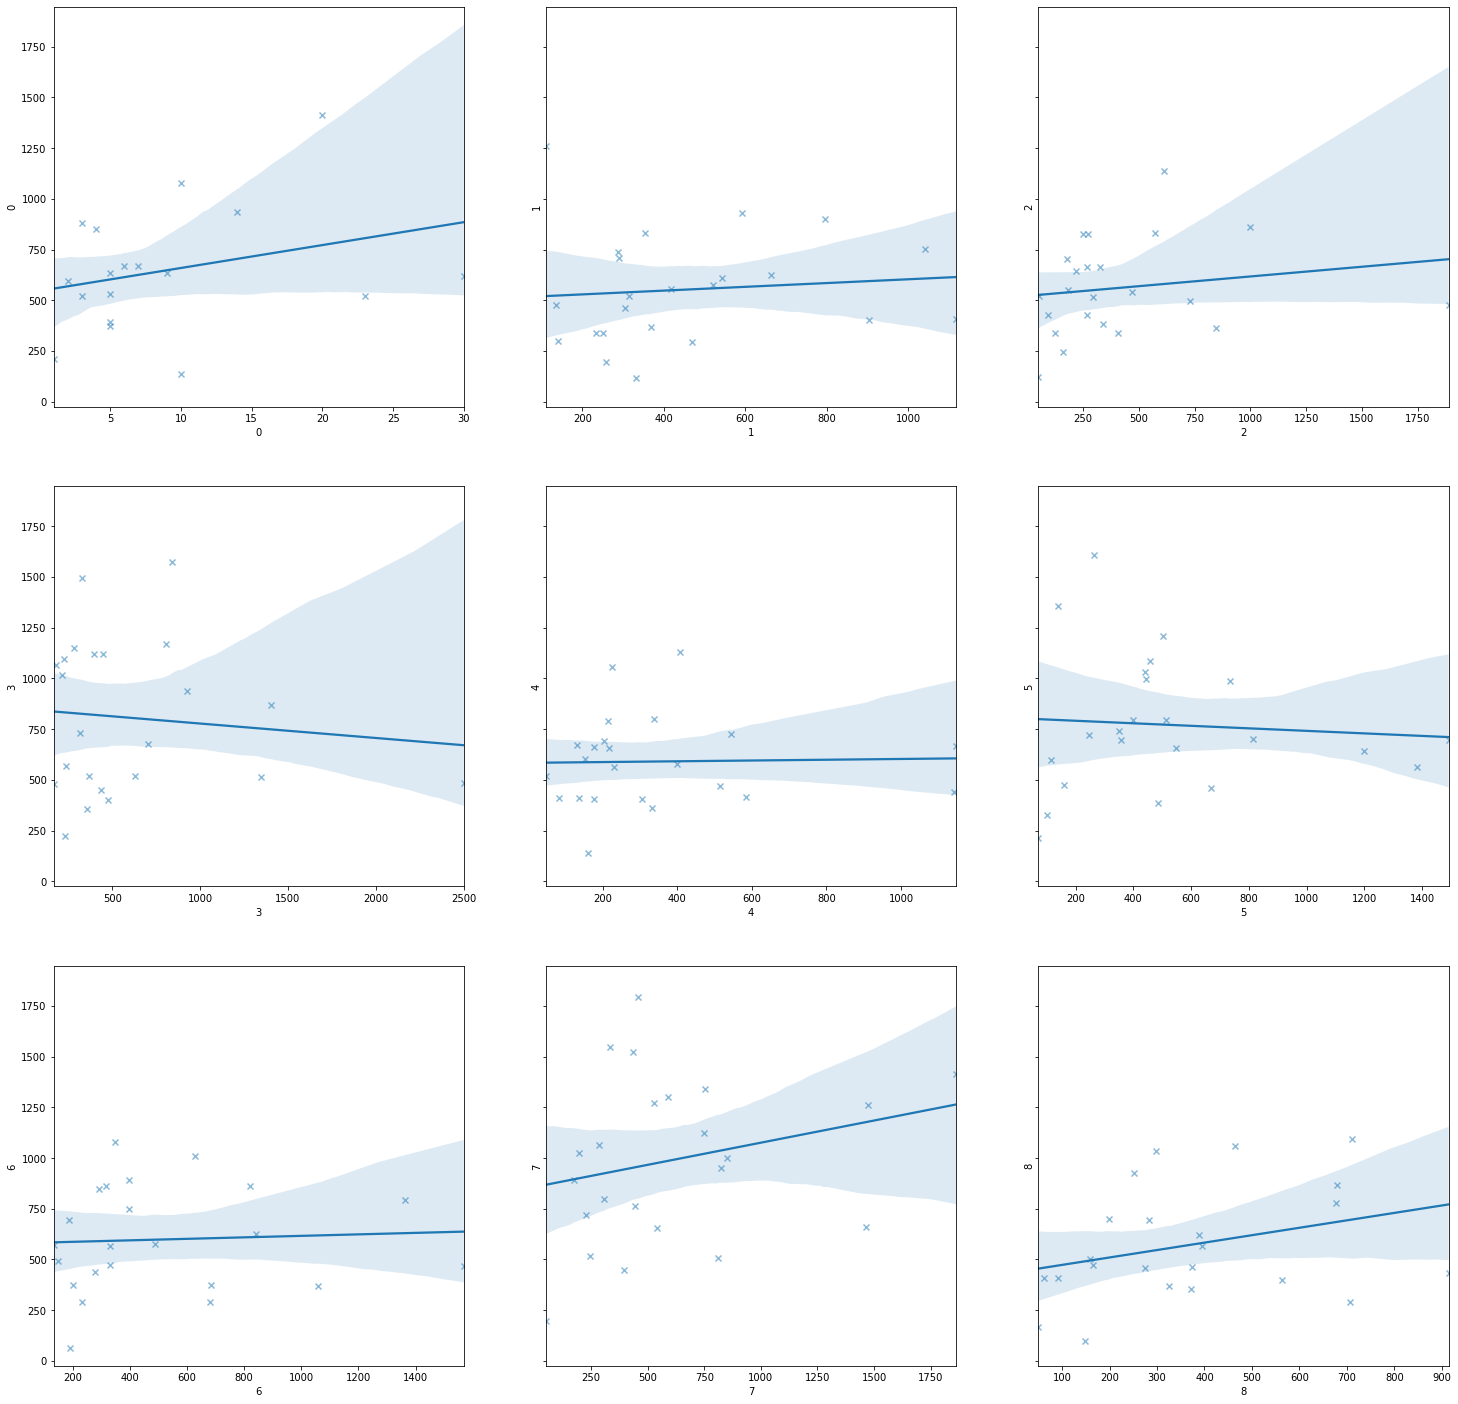

In [45]:
fig,ax = plt.subplots(3,3,figsize=(25,25),sharey=True)
for i in range(9):
    sns.regplot(x=count_by_type_crime_and_district.iloc[i,:], y=resp_by_type_crime_and_district.iloc[i,:],scatter_kws={'alpha':0.5},ax=ax[i//3][i%3],marker='x')

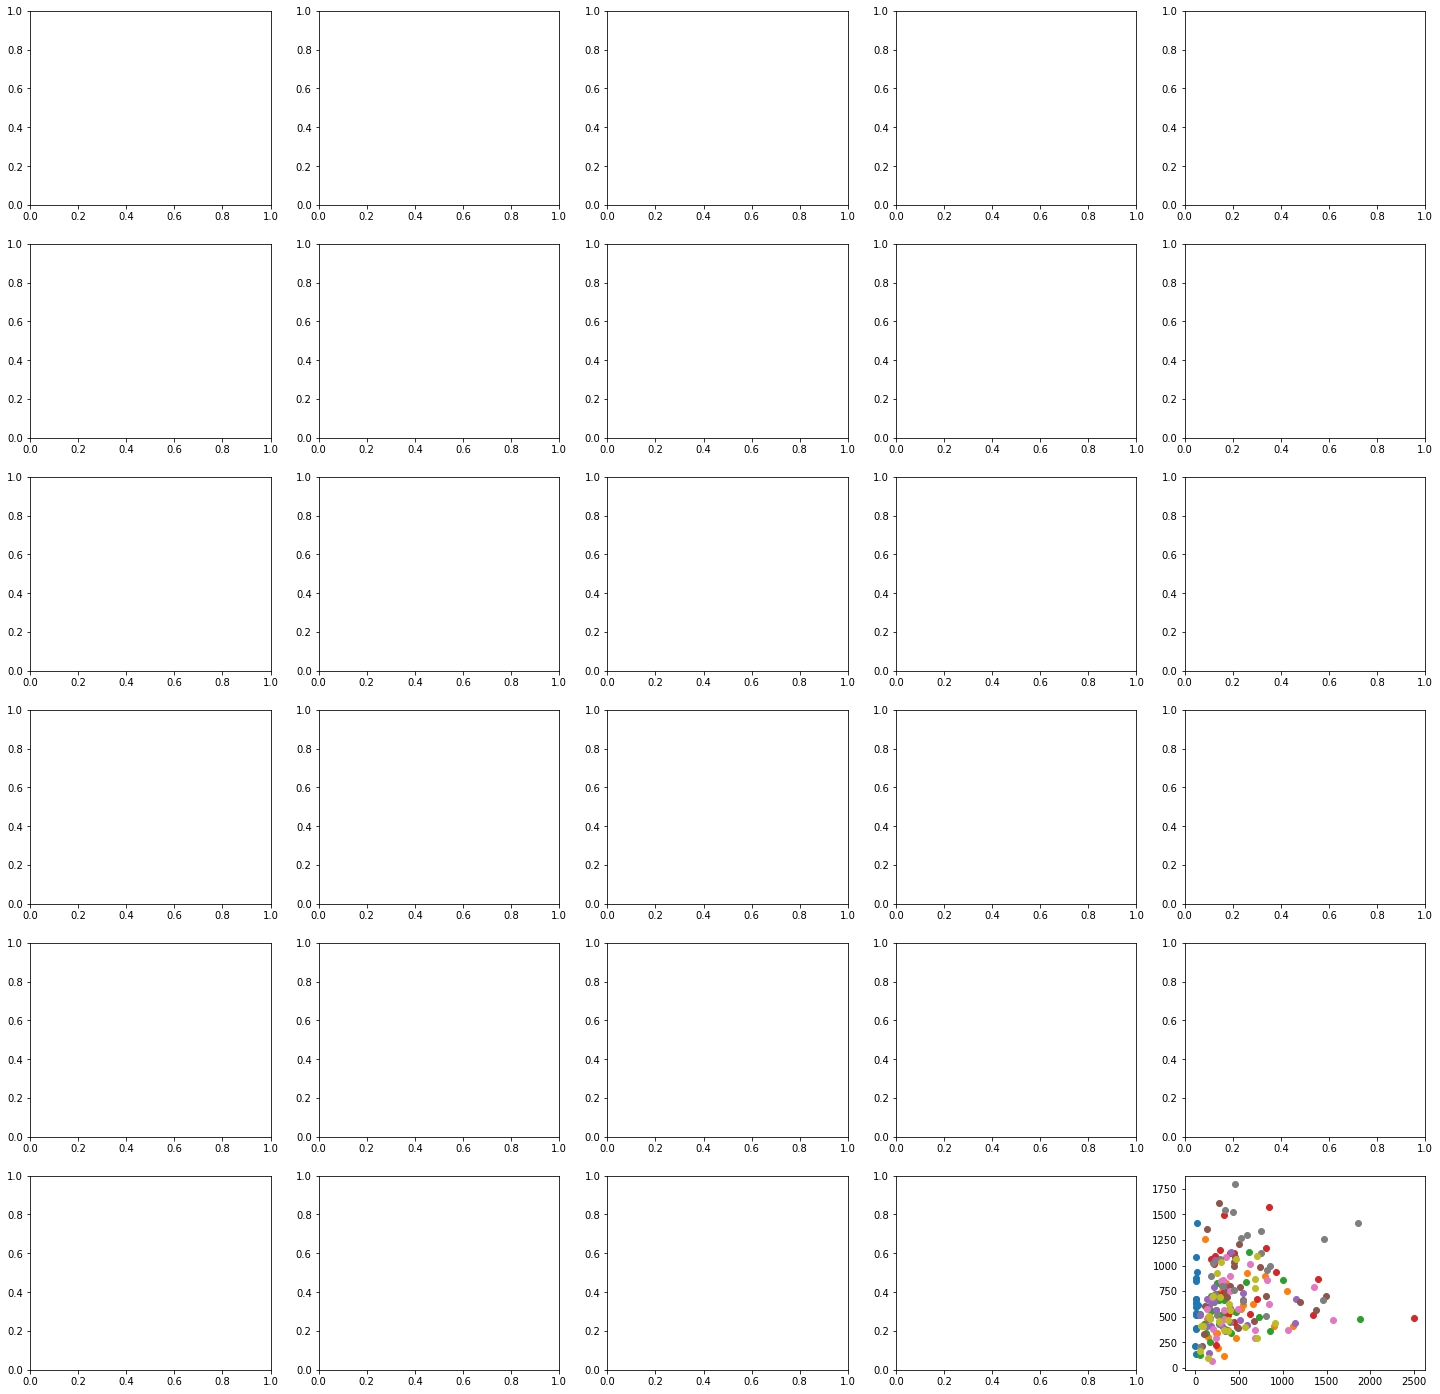

In [46]:
fig,ax = plt.subplots(6,5,figsize=(25,25))
for i in range(9):
    plt.scatter(x=count_by_type_crime_and_district.iloc[i,:], y=resp_by_type_crime_and_district.iloc[i,:])

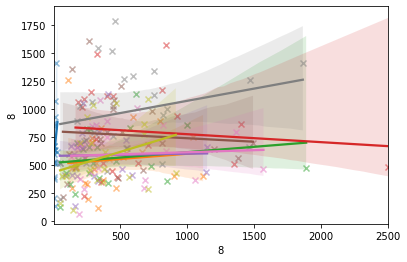

In [47]:
for i in range(9):
    sns.regplot(x=count_by_type_crime_and_district.iloc[i,:], y=resp_by_type_crime_and_district.iloc[i,:],scatter_kws={'alpha':0.5},marker='x')